In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0116'] = v[' D4N0116']
df['D4N0115'] = z[' D4N0115']
df['D4N0116'] = v[' D4N0116']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0116  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ..

In [5]:
df = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0116','D4N0115','D4N0116' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

D4N0834  D4N0111  D4N0122  D4N0037  D4N0115  D4N0116  Temperature  \
year_month                                                                      
1950-01-01      NaN      NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01      NaN      NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01      NaN      NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01      NaN      NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01      NaN      NaN      NaN      NaN      NaN      NaN        14.60   
...             ...      ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 10 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0116','D4N0115','D4N0116' ]].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0116
0 1986-09-01 1976-01-01 1975-05-01 1973-08-01 1975-05-01 1975-05-01
1 2005-01-01 2009-11-01 2003-11-01 2012-02-01 2005-03-01 2005-01-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1973-09-01']  
gwls = gwls[gwls.index < '2012-03-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

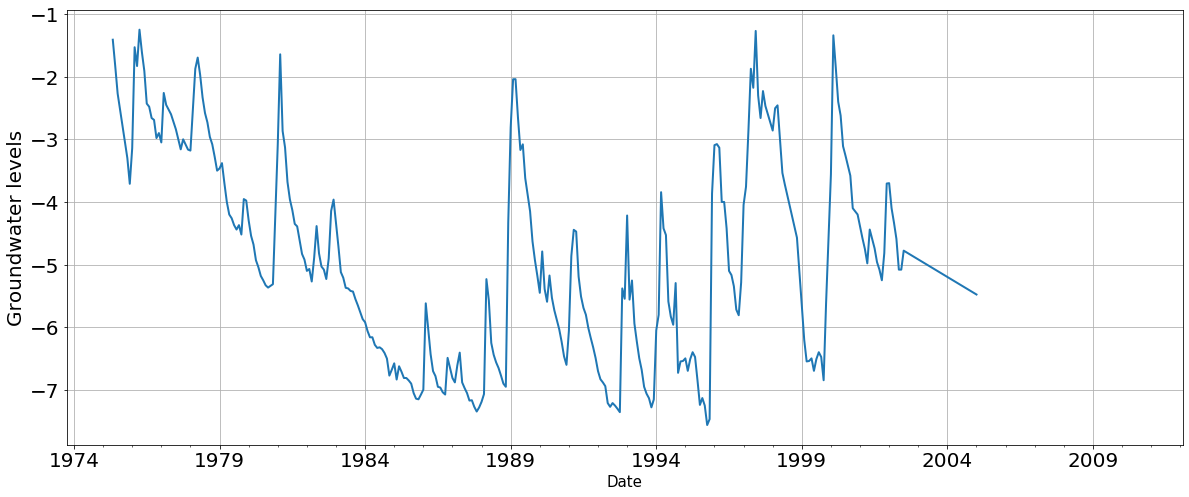

In [10]:
#visual illustration just to show all groundwater levels 

gwls['D4N0116'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834  D4N0111  D4N0122    D4N0037  D4N0115  D4N0116  \
year_month                                                           
1973-10-01      NaN      NaN      NaN -21.500000      NaN      NaN   
1973-11-01      NaN      NaN      NaN -21.500000      NaN      NaN   
1973-12-01      NaN      NaN      NaN -21.340000      NaN      NaN   
1974-01-01      NaN      NaN      NaN -21.130000      NaN      NaN   
1974-02-01      NaN      NaN      NaN -20.347500      NaN      NaN   
...             ...      ...      ...        ...      ...      ...   
2011-10-01      NaN      NaN      NaN -30.700000      NaN      NaN   
2011-11-01      NaN      NaN      NaN -30.069891      NaN      NaN   
2011-12-01      NaN      NaN      NaN -29.460109      NaN      NaN   
2012-01-01      NaN      NaN      NaN -28.830000      NaN      NaN   
2012-02-01      NaN      NaN      NaN -28.850000      NaN      NaN   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1973-10-01        21.00     73.158333      0.091  4.519858e+04  
1973-11-01        22.05     73.116667      0.096  4.519858e+04  
1973-12-01        22.80     73.116667      0.096  4.519858e+04  
1974-01-01        23.60     73.045833      0.088  7.444367e+04  
1974-02-01        23.50     71.141667      0.079  7.444367e+04  
...                 ...           ...        ...           ...  
2011-10-01        19.30     44.183333      0.644  2.424806e+06  
2011-11-01        21.50     38.333333      0.633  2.424806e+06  
2011-12-01        22.00     35.783333      0.629  2.424806e+06  
2012-01-01        23.35     34.008333      0.612  2.417254e+06  
2012-02-01        22.70     33.908333      0.588  2.417254e+06  

[461 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [12]:
pima = gwls.filter(['D4N0116', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1975-04-01']  
pima = pima[pima.index < '2002-12-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0116          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

In [15]:
#pima.to_excel('/Users/yolanda/Downloads/BHID_D4N0116.xlsx')

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0116 Temperature precip_trend  Discharge Abstraction
0 1975-05-01  1975-05-01   1975-05-01 1975-05-01  1975-05-01
1 2002-11-01  2002-11-01   2002-11-01 2002-11-01  2002-11-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0116']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0116','D4N0115','D4N0110' 

In [19]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.081634
precip_trend    0.491805
Discharge       0.800389
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip834  = pima.filter(['D4N0116', 'precip_trend'])
discha834  = pima.filter(['D4N0116', 'Discharge'])
temp834    = pima.filter(['D4N0116', 'Temperature'])
abstr834   = pima.filter(['D4N0116', 'Abstraction'])

In [21]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

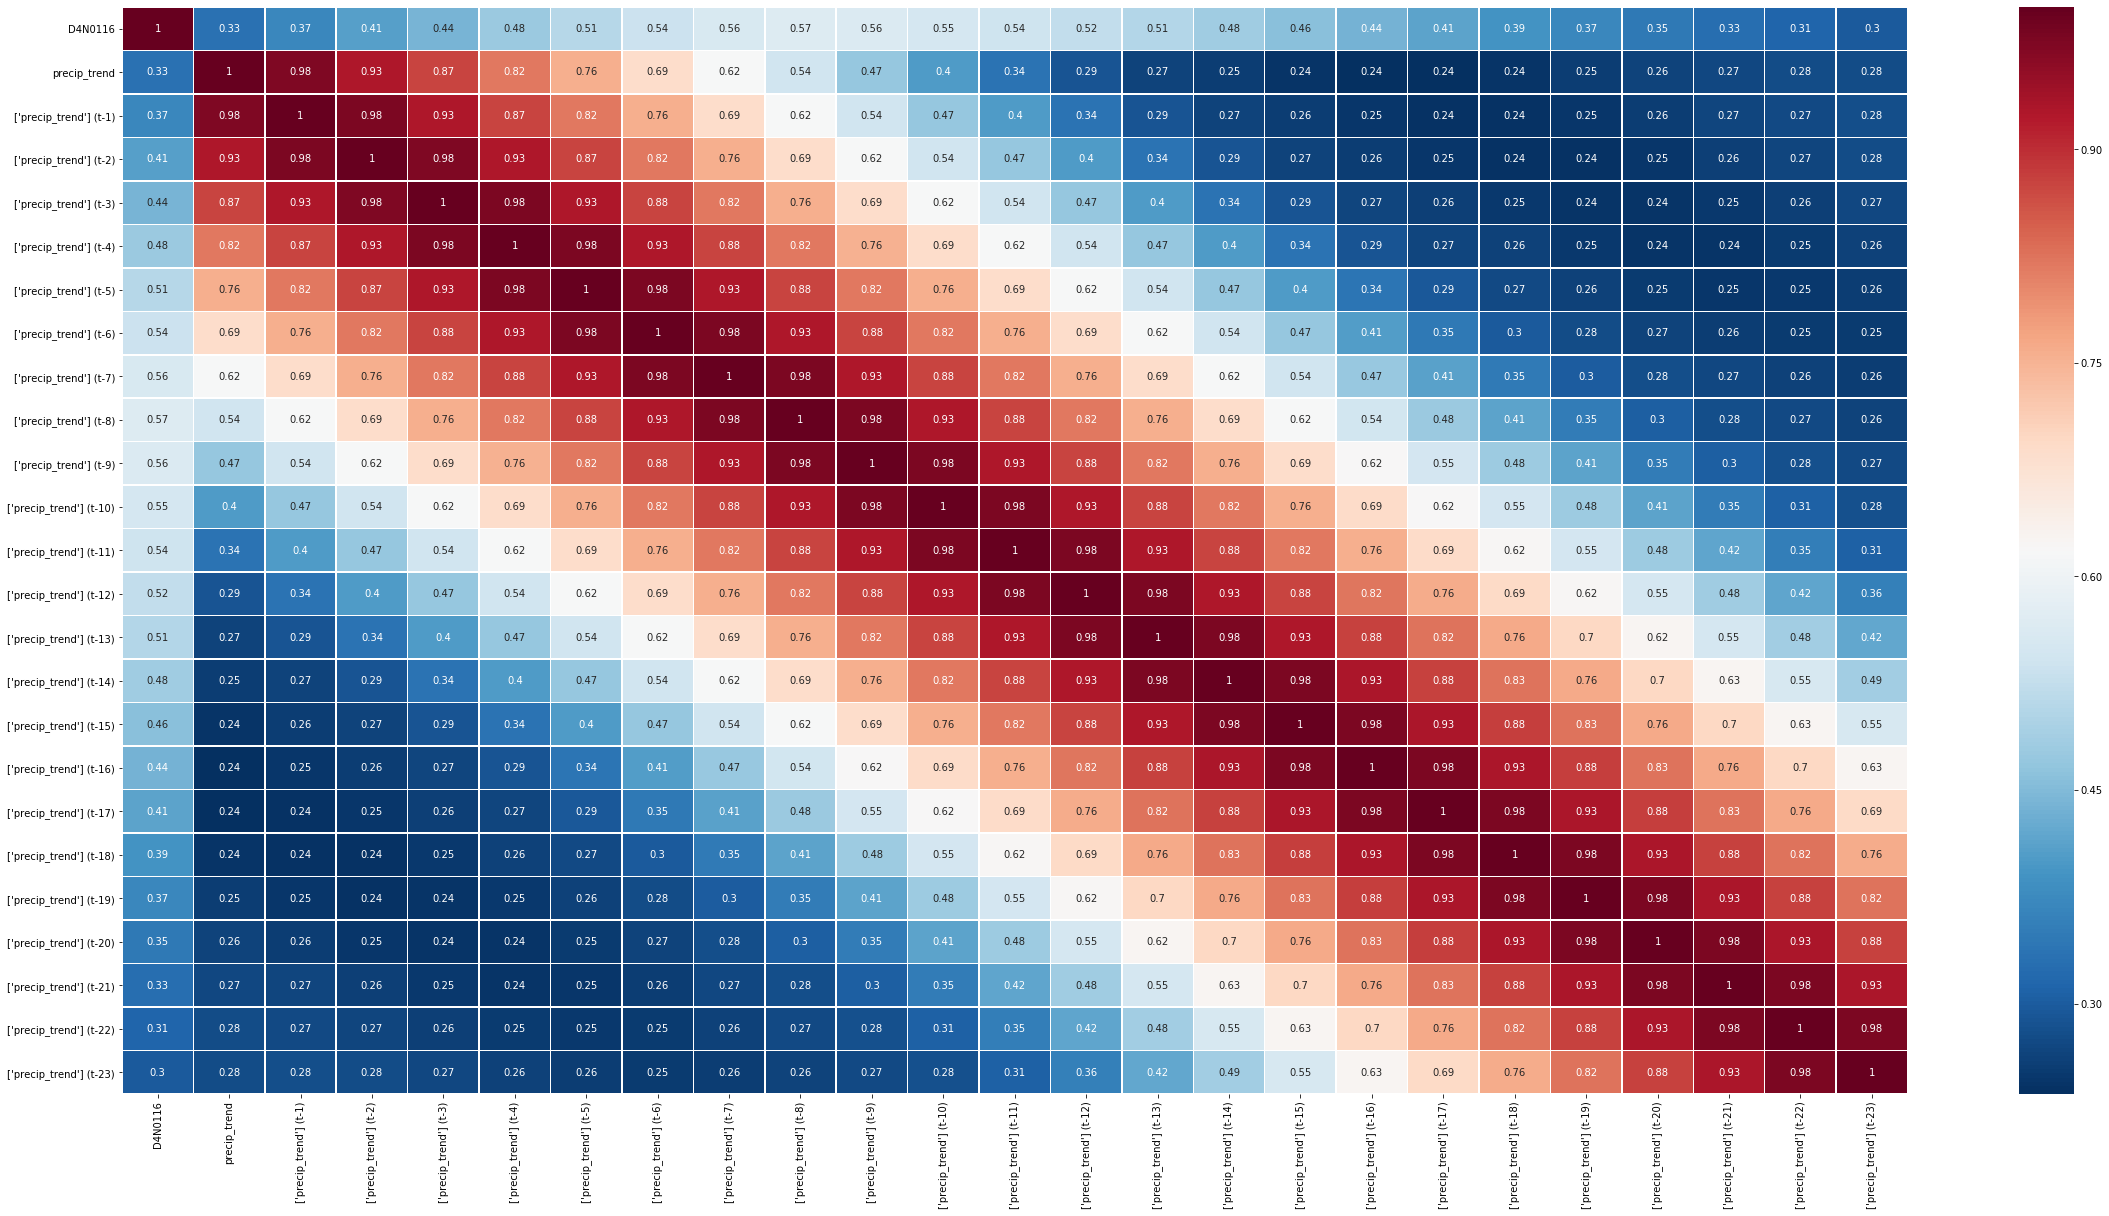

In [22]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

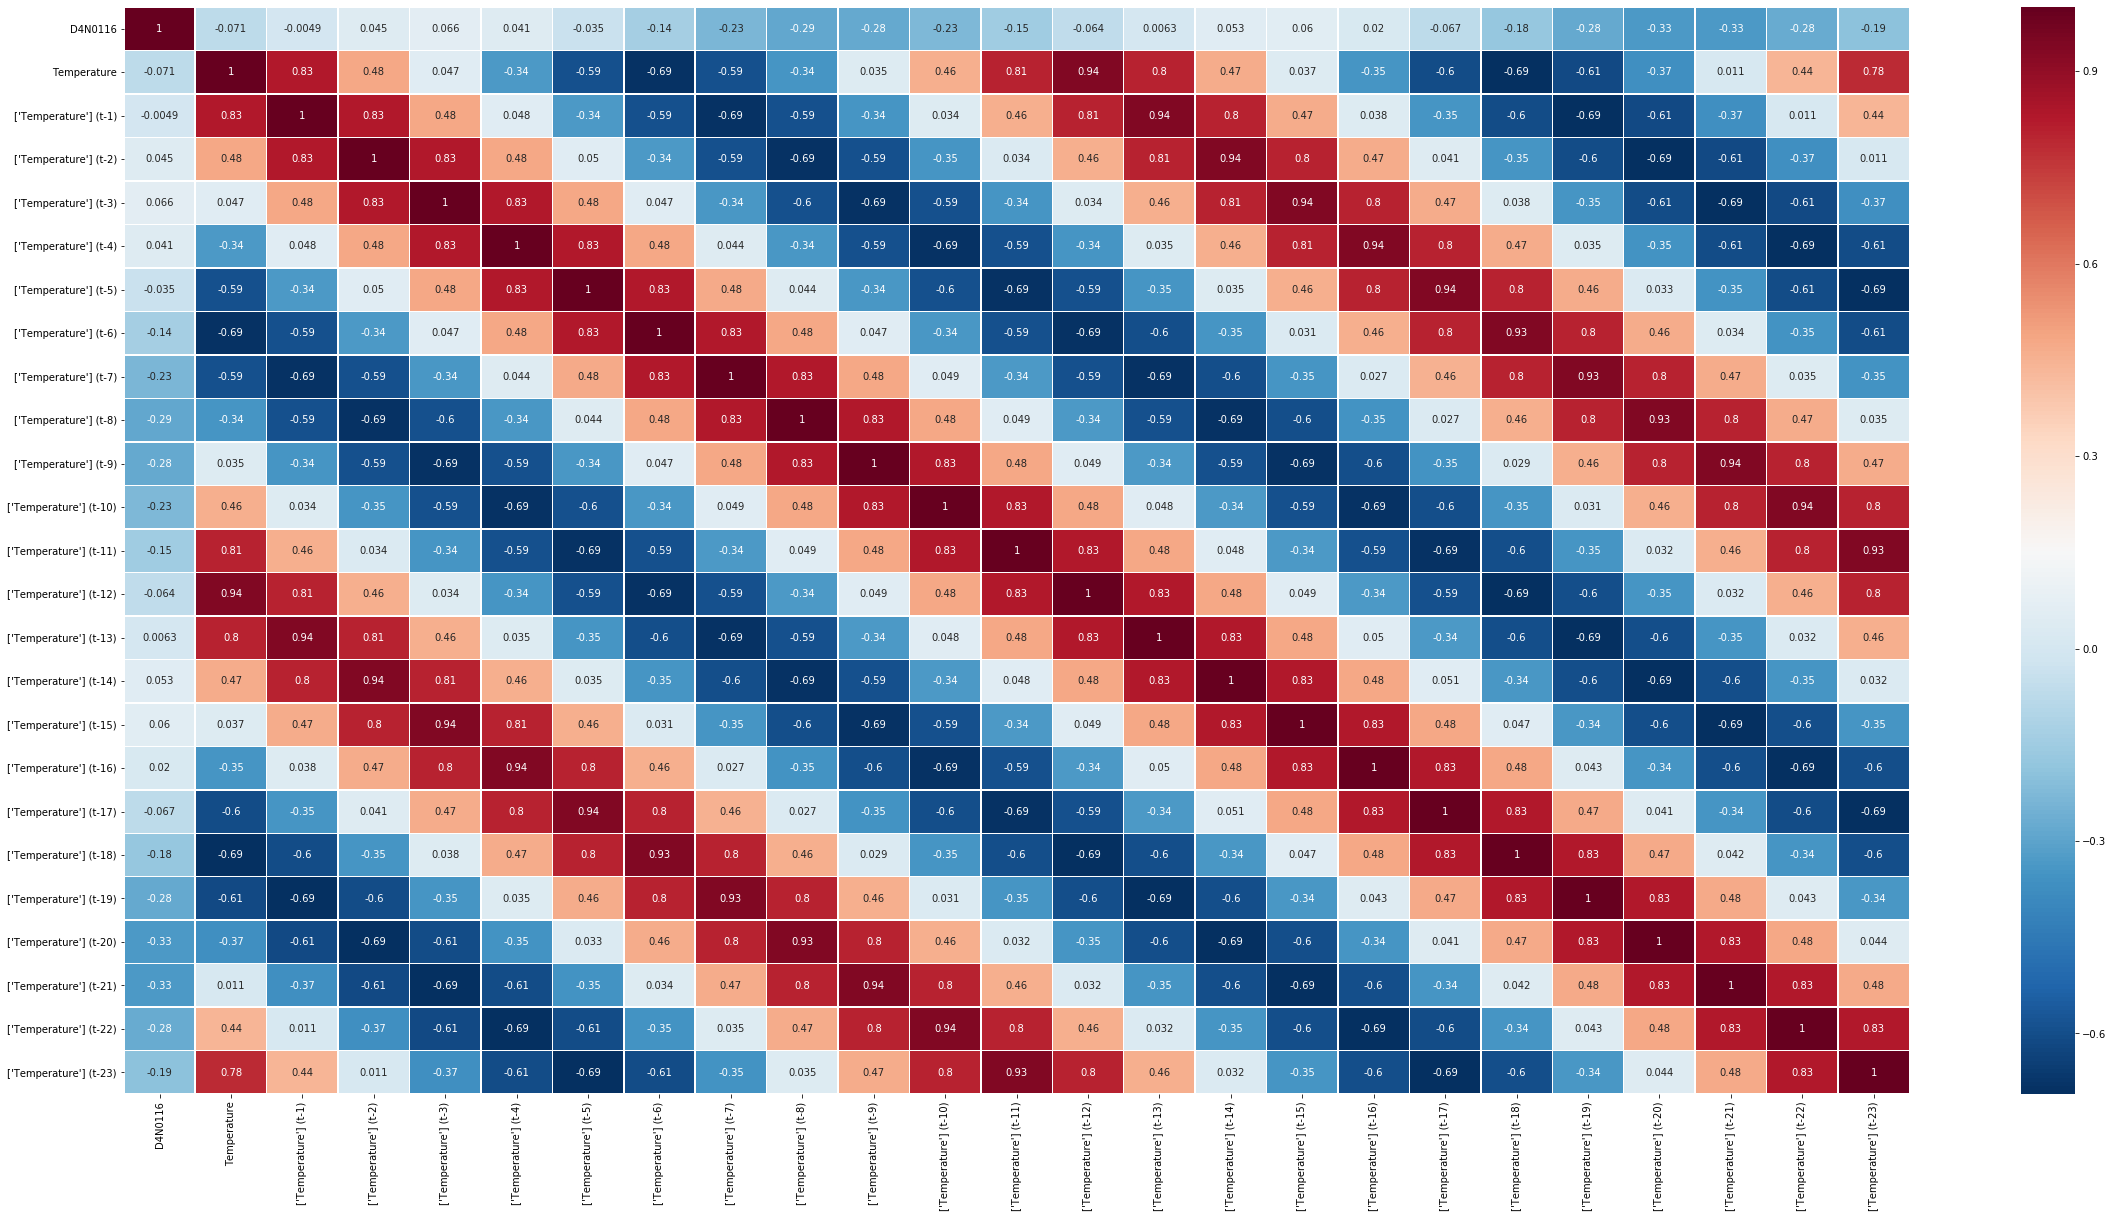

In [23]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [35]:
pima['Temperature (t-5)'] = pima.Temperature.shift(5)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(1)
pima

D4N0116  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1975-05-01 -1.410000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -1.830000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -2.270000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -2.529593        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -2.789187        19.80     93.183333      0.809  1.665429e+05   
...              ...          ...           ...        ...           ...   
2002-07-01 -4.777158        10.05     34.441667      0.514  2.568580e+06   
2002-08-01 -4.800486        14.50     39.850000      0.510  2.568580e+06   
2002-09-01 -4.823813        16.50     41.625000      0.509  2.568580e+06   
2002-10-01 -4.847140        20.10     40.700000      0.501  2.568580e+06   
2002-11-01 -4.870467        20.20     36.725000      0.471  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1975-05-01                NaN                  NaN  
1975-06-01                NaN            76.900000  
1975-07-01                NaN            83.904167  
1975-08-01                NaN            89.433333  
1975-09-01                NaN            93.183333  
...                       ...                  ...  
2002-07-01              21.35            32.116667  
2002-08-01              20.75            34.441667  
2002-09-01              18.75            39.850000  
2002-10-01              13.85            41.625000  
2002-11-01              10.15            40.700000  

[331 rows x 7 columns]

In [36]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0116']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0116','D4N0115','D4N0110' 

In [37]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [38]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.158097
precip_trend (t-16)    0.500702
Discharge              0.808193
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0116']

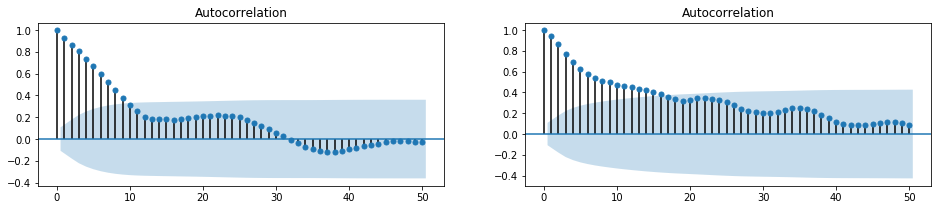

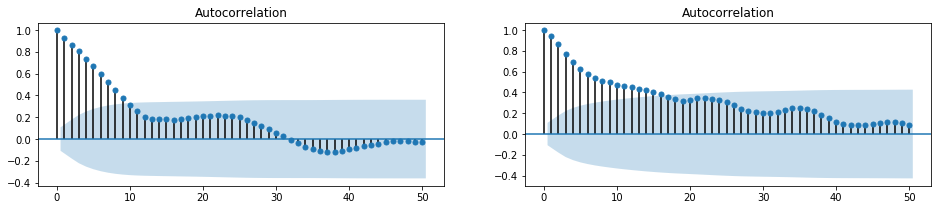

In [41]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

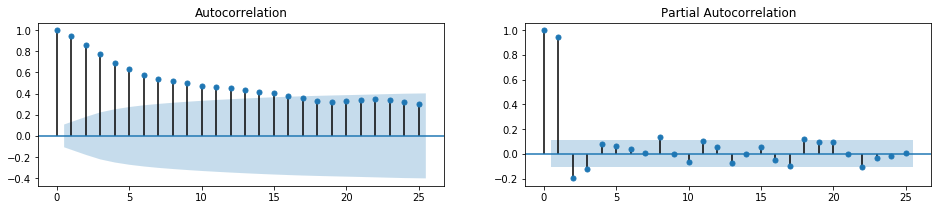

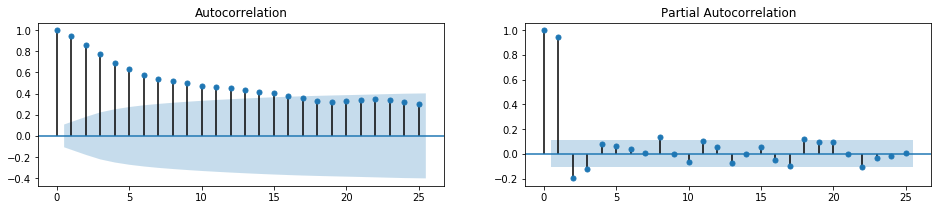

In [42]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

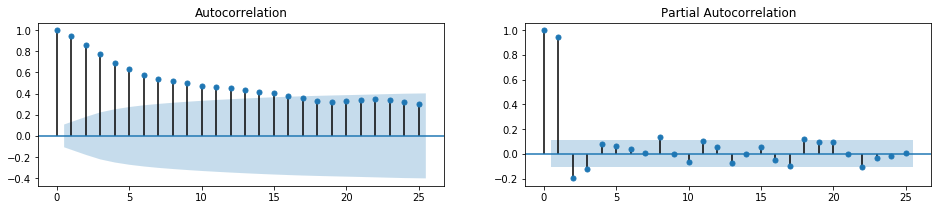

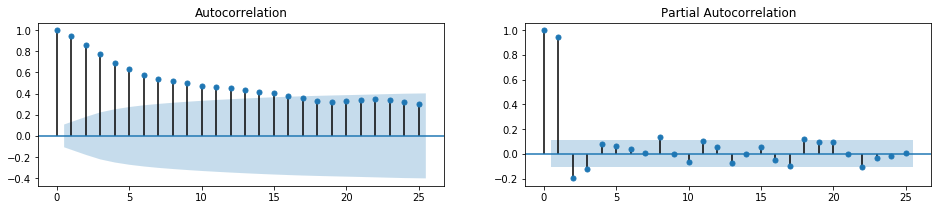

In [43]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

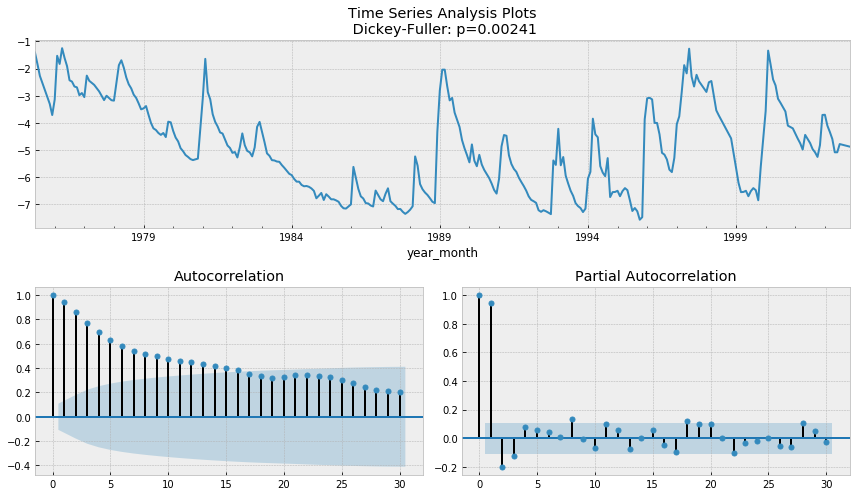

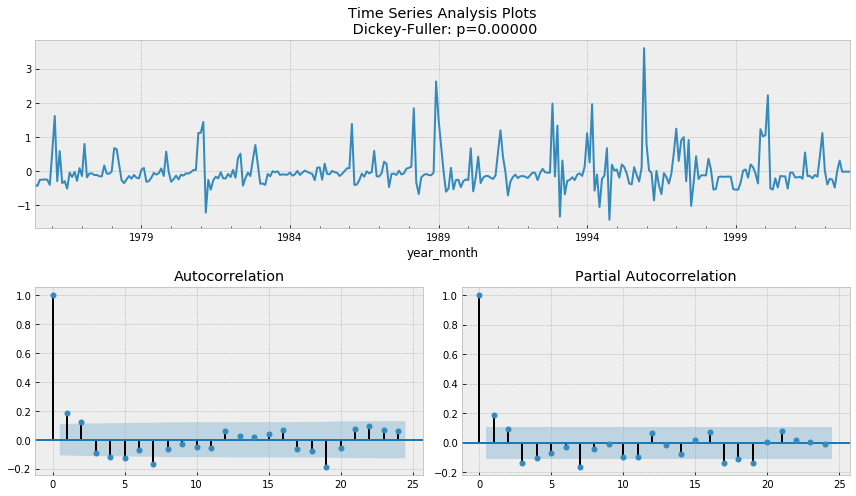

In [44]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0116_diff = bhid - bhid.shift(1)

tsplot(D4N0116_diff[1:], lags=24)

#### Rainfall

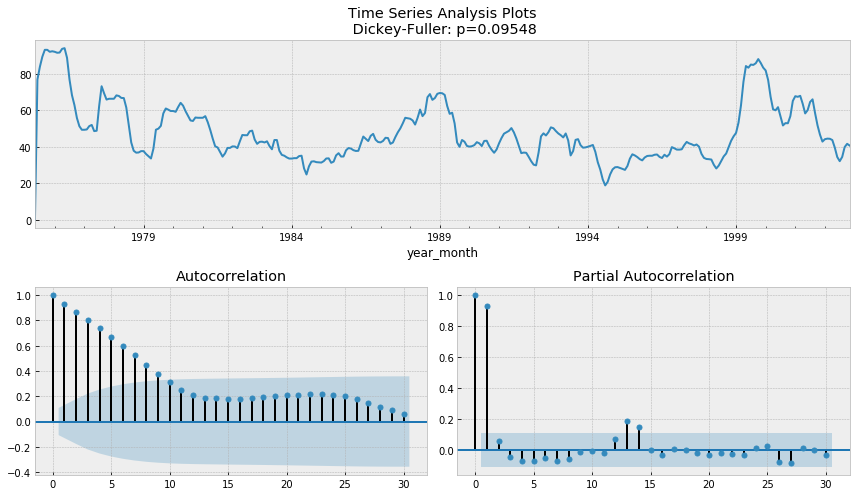

In [45]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

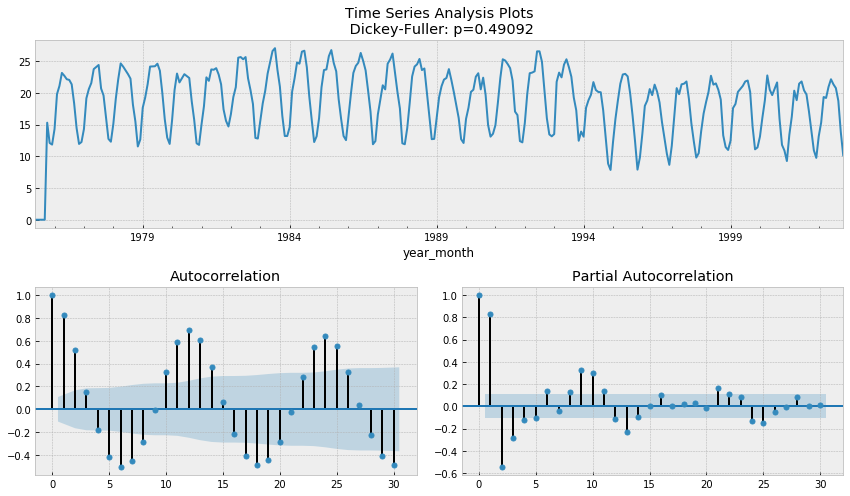

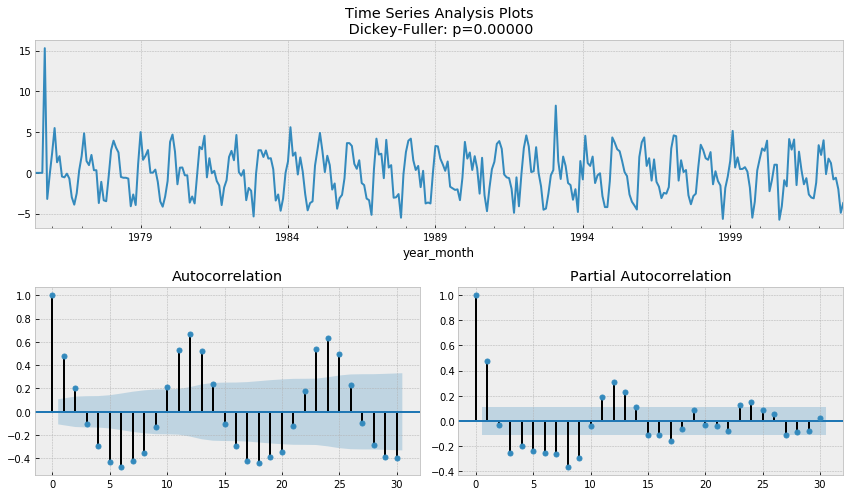

In [46]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

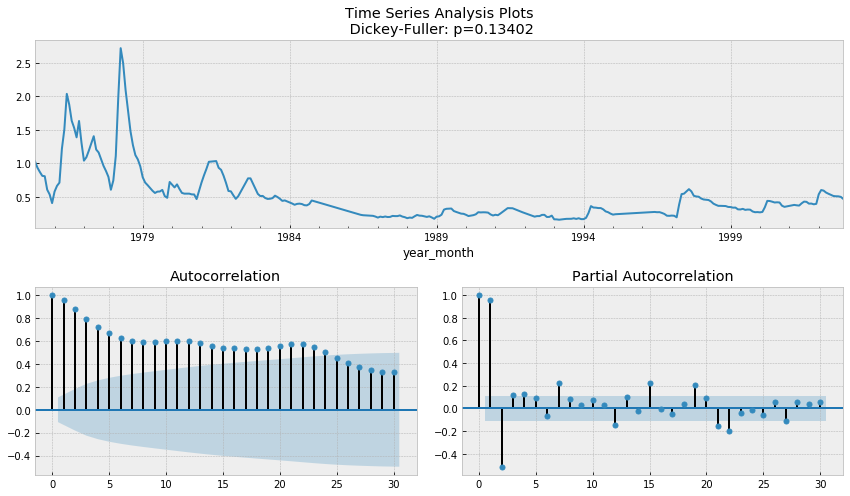

In [47]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

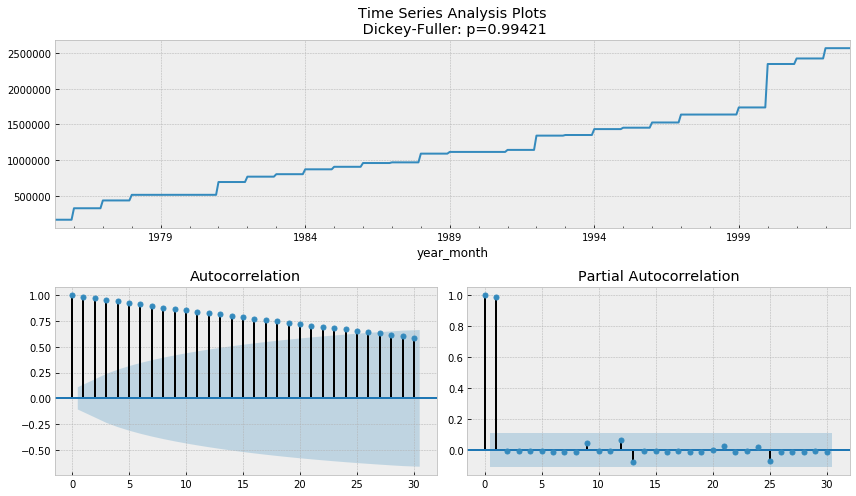

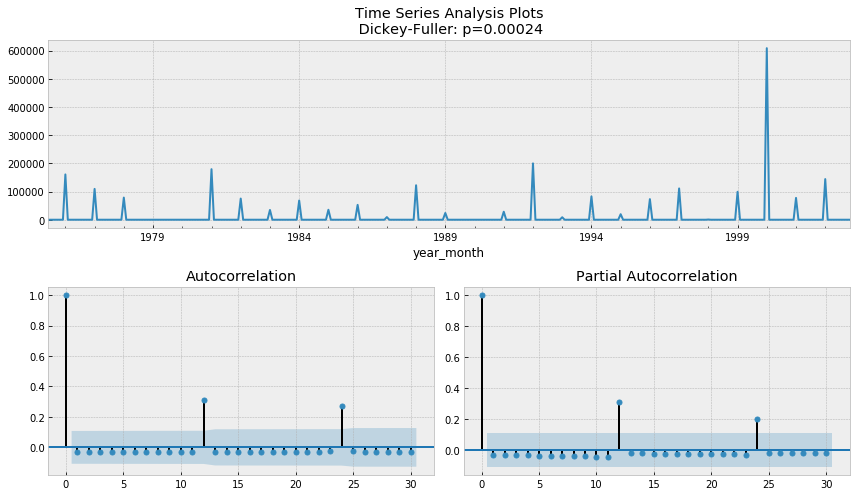

In [48]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [49]:
pima_diff = pd.DataFrame({'D4N0116': D4N0116_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0116','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0116           1
Temperature       1
precip_trend    331
Discharge         0
Abstraction       1
dtype: int64

In [50]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0116','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

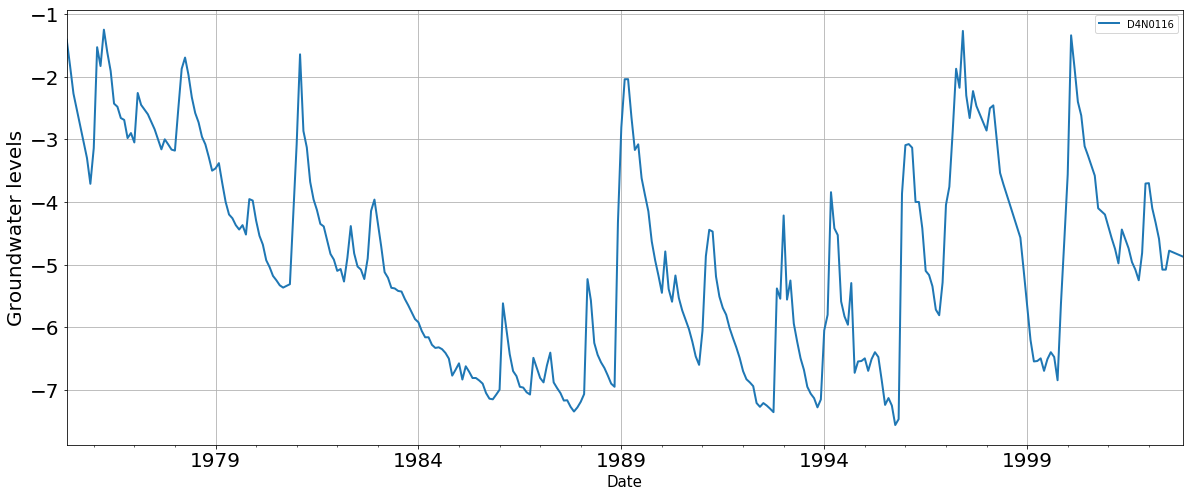

In [51]:
pima[['D4N0116']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [52]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [53]:
pima

D4N0116  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1975-05-01 -1.410000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -1.830000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -2.270000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -2.529593        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -2.789187        19.80     93.183333      0.809  1.665429e+05   
...              ...          ...           ...        ...           ...   
2002-07-01 -4.777158        10.05     34.441667      0.514  2.568580e+06   
2002-08-01 -4.800486        14.50     39.850000      0.510  2.568580e+06   
2002-09-01 -4.823813        16.50     41.625000      0.509  2.568580e+06   
2002-10-01 -4.847140        20.10     40.700000      0.501  2.568580e+06   
2002-11-01 -4.870467        20.20     36.725000      0.471  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-05-01                NaN                  NaN               NaN   
1975-06-01                NaN            76.900000          5.355426   
1975-07-01                NaN            83.904167          5.441523   
1975-08-01                NaN            89.433333          5.504613   
1975-09-01                NaN            93.183333          5.545243   
...                       ...                  ...               ...   
2002-07-01              21.35            32.116667          4.500037   
2002-08-01              20.75            34.441667          4.567888   
2002-09-01              18.75            39.850000          4.709907   
2002-10-01              13.85            41.625000          4.752441   
2002-11-01              10.15            40.700000          4.730501   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1975-05-01              NaN       1.709021        13.023014  
1975-06-01              NaN       1.661657        13.023014  
1975-07-01              NaN       1.627007        13.023014  
1975-08-01              NaN       1.595534        13.023014  
1975-09-01              NaN       1.592774        13.023014  
...                     ...            ...              ...  
2002-07-01         4.106826       1.414755        15.758864  
2002-08-01         4.079614       1.412110        15.758864  
2002-09-01         3.983153       1.411447        15.758864  
2002-10-01         3.698000       1.406132        15.758864  
2002-11-01         3.411439       1.385942        15.758864  

[331 rows x 11 columns]

In [54]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0116.shift(obs)
pima.fillna(0, inplace=True)

In [55]:
pima

D4N0116  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1975-05-01 -1.410000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -1.830000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -2.270000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -2.529593        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -2.789187        19.80     93.183333      0.809  1.665429e+05   
...              ...          ...           ...        ...           ...   
2002-07-01 -4.777158        10.05     34.441667      0.514  2.568580e+06   
2002-08-01 -4.800486        14.50     39.850000      0.510  2.568580e+06   
2002-09-01 -4.823813        16.50     41.625000      0.509  2.568580e+06   
2002-10-01 -4.847140        20.10     40.700000      0.501  2.568580e+06   
2002-11-01 -4.870467        20.20     36.725000      0.471  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-05-01               0.00             0.000000          0.000000   
1975-06-01               0.00            76.900000          5.355426   
1975-07-01               0.00            83.904167          5.441523   
1975-08-01               0.00            89.433333          5.504613   
1975-09-01               0.00            93.183333          5.545243   
...                       ...                  ...               ...   
2002-07-01              21.35            32.116667          4.500037   
2002-08-01              20.75            34.441667          4.567888   
2002-09-01              18.75            39.850000          4.709907   
2002-10-01              13.85            41.625000          4.752441   
2002-11-01              10.15            40.700000          4.730501   

            Temperature_log  Discharge_log  Abstraction_log       t_1  \
year_month                                                              
1975-05-01         0.000000       1.709021        13.023014  0.000000   
1975-06-01         0.000000       1.661657        13.023014 -1.410000   
1975-07-01         0.000000       1.627007        13.023014 -1.830000   
1975-08-01         0.000000       1.595534        13.023014 -2.270000   
1975-09-01         0.000000       1.592774        13.023014 -2.529593   
...                     ...            ...              ...       ...   
2002-07-01         4.106826       1.414755        15.758864 -5.080000   
2002-08-01         4.079614       1.412110        15.758864 -4.777158   
2002-09-01         3.983153       1.411447        15.758864 -4.800486   
2002-10-01         3.698000       1.406132        15.758864 -4.823813   
2002-11-01         3.411439       1.385942        15.758864 -4.847140   

                 t_2       t_3       t_4  
year_month                                
1975-05-01  0.000000  0.000000  0.000000  
1975-06-01  0.000000  0.000000  0.000000  
1975-07-01 -1.410000  0.000000  0.000000  
1975-08-01 -1.830000 -1.410000  0.000000  
1975-09-01 -2.270000 -1.830000 -1.410000  
...              ...       ...       ...  
2002-07-01 -5.080000 -4.590000 -4.332542  
2002-08-01 -5.080000 -5.080000 -4.590000  
2002-09-01 -4.777158 -5.080000 -5.080000  
2002-10-01 -4.800486 -4.777158 -5.080000  
2002-11-01 -4.823813 -4.800486 -4.777158  

[331 rows x 15 columns]

In [56]:
pima.shape

(331, 15)

In [57]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0116']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [58]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0116']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.014886
precip_trend_log    0.185056
Discharge_log       0.333389
Abstraction_log     0.385805
t_1                 1.000000
t_2                 0.735758
dtype: float64

In [59]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0116'].values
y = y.reshape(-1,1)

In [60]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(276, 6) (276, 1)
(55, 6) (55, 1)


In [61]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [64]:
y_test[0]

array([0.83038874])

### LSTM

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [65]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(55, 6)

    #running function
    gwl = 0.83038874
    test_forecast = X_test
    steps_ahead = 55
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 276 samples, validate on 55 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/276 [=========>....................] - ETA: 3s - loss: 1.0203 - mean_squared_error: 1.0203
Epoch 00001: val_loss improved from inf to 0.51055, saving model to model.h5
276/276 [==============================] - 3s 10ms/sample - loss: 0.9825 - mean_squared_error: 0.9825 - val_loss: 0.5105 - val_mean_squared_error: 0.5105
Epoch 2/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.8256 - mean_squared_error: 0.8256
Epoch 00002: val_loss improved from 0.51055 to 0.49733, saving model to model.h5
276/276 [==============================] - 0s 295us/sample - loss: 0.8651 - mean_squared_error: 0.8651 - val_loss: 0.4973 - val_mean_squared_error: 0.4973
Epoch 3/1000
 96/276 [=========>....

276/276 [==============================] - 0s 206us/sample - loss: 0.2502 - mean_squared_error: 0.2502 - val_loss: 0.2803 - val_mean_squared_error: 0.2803
Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 00023: val_loss improved from 0.28025 to 0.26589, saving model to model.h5
276/276 [==============================] - 0s 209us/sample - loss: 0.2398 - mean_squared_error: 0.2398 - val_loss: 0.2659 - val_mean_squared_error: 0.2659
Epoch 24/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2194 - mean_squared_error: 0.2194
Epoch 00024: val_loss improved from 0.26589 to 0.25260, saving model to model.h5
276/276 [==============================] - 0s 173us/sample - loss: 0.2331 - mean_squared_error: 0.2331 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 25/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 00025: val_loss improved from 0.25260 to

Epoch 48/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1478 - mean_squared_error: 0.1478
Epoch 00048: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 193us/sample - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 49/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 00049: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 99us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 50/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 00050: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 97us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 51/1000
 96/276 [=========>....................] - 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1497 - mean_squared_error: 0.1497
Epoch 00074: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 106us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.3117 - val_mean_squared_error: 0.3117
Epoch 75/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00075: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 107us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.3142 - val_mean_squared_error: 0.3142
Epoch 76/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00076: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 101us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.3184 - val_mean_squared_error: 0.3184
Epoch 77/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00100: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 154us/sample - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.3302 - val_mean_squared_error: 0.3302
Epoch 101/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00101: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 155us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.3308 - val_mean_squared_error: 0.3308
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1340 - mean_squared_error: 0.1340
Epoch 00102: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 194us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.3300 - val_mean_squared_error: 0.3300
Epoch 103/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 126/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1280 - mean_squared_error: 0.1280
Epoch 00126: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 138us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.3304 - val_mean_squared_error: 0.3304
Epoch 127/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00127: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 118us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.3334 - val_mean_squared_error: 0.3334
Epoch 128/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00128: val_loss did not improve from 0.18881
276/276 [==============================] - 0s 106us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.3319 - val_mean_squared_error: 0.3319
Epoch 129/1000
 96/276 [=========>..................

 96/276 [=========>....................] - ETA: 0s - loss: 0.3526 - mean_squared_error: 0.3526
Epoch 00017: val_loss improved from 0.61409 to 0.59778, saving model to model.h5
276/276 [==============================] - 0s 213us/sample - loss: 0.4154 - mean_squared_error: 0.4154 - val_loss: 0.5978 - val_mean_squared_error: 0.5978
Epoch 18/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3895 - mean_squared_error: 0.3895
Epoch 00018: val_loss improved from 0.59778 to 0.57996, saving model to model.h5
276/276 [==============================] - 0s 211us/sample - loss: 0.3942 - mean_squared_error: 0.3942 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 19/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4157 - mean_squared_error: 0.4157
Epoch 00019: val_loss improved from 0.57996 to 0.56070, saving model to model.h5
276/276 [==============================] - 0s 263us/sample - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.5607 - val_mean_s

Epoch 41/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1436 - mean_squared_error: 0.1436
Epoch 00041: val_loss improved from 0.16662 to 0.15977, saving model to model.h5
276/276 [==============================] - 0s 178us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 0.1598 - val_mean_squared_error: 0.1598
Epoch 42/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 00042: val_loss improved from 0.15977 to 0.15415, saving model to model.h5
276/276 [==============================] - 0s 155us/sample - loss: 0.1500 - mean_squared_error: 0.1500 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 43/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2206 - mean_squared_error: 0.2206
Epoch 00043: val_loss improved from 0.15415 to 0.14963, saving model to model.h5
276/276 [==============================] - 0s 170us/sample - loss: 0.1514 - mean_squared_error: 0.1514 - val_loss: 0.149

Epoch 67/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1435 - mean_squared_error: 0.1435
Epoch 00067: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 157us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.1797 - val_mean_squared_error: 0.1797
Epoch 68/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1248 - mean_squared_error: 0.1248
Epoch 00068: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 112us/sample - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.1805 - val_mean_squared_error: 0.1805
Epoch 69/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00069: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 111us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1818 - val_mean_squared_error: 0.1818
Epoch 70/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 00093: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 124us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 94/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1247 - mean_squared_error: 0.1247
Epoch 00094: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 148us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.2019 - val_mean_squared_error: 0.2019
Epoch 95/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00095: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 126us/sample - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 96/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00119: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 147us/sample - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 120/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 00120: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 159us/sample - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 121/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1395 - mean_squared_error: 0.1395
Epoch 00121: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 124us/sample - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 122/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 145/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 00145: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 116us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 146/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 00146: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 109us/sample - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 147/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0925 - mean_squared_error: 0.0925
Epoch 00147: val_loss did not improve from 0.14314
276/276 [==============================] - 0s 142us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Running fold 3
(276, 6)
Train on 276 samples, valida

Epoch 22/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2504 - mean_squared_error: 0.2504
Epoch 00022: val_loss improved from 0.30258 to 0.28591, saving model to model.h5
276/276 [==============================] - 0s 202us/sample - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 0.2859 - val_mean_squared_error: 0.2859
Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 00023: val_loss improved from 0.28591 to 0.26956, saving model to model.h5
276/276 [==============================] - 0s 186us/sample - loss: 0.2395 - mean_squared_error: 0.2395 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 24/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2178 - mean_squared_error: 0.2178
Epoch 00024: val_loss improved from 0.26956 to 0.25550, saving model to model.h5
276/276 [==============================] - 0s 200us/sample - loss: 0.2258 - mean_squared_error: 0.2258 - val_loss: 0.255

Epoch 47/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00047: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 153us/sample - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.2353 - val_mean_squared_error: 0.2353
Epoch 48/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1618 - mean_squared_error: 0.1618
Epoch 00048: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 99us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.2404 - val_mean_squared_error: 0.2404
Epoch 49/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1529 - mean_squared_error: 0.1529
Epoch 00049: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 100us/sample - loss: 0.1317 - mean_squared_error: 0.1317 - val_loss: 0.2463 - val_mean_squared_error: 0.2463
Epoch 50/1000
 96/276 [=========>....................] -

 96/276 [=========>....................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00073: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 184us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 74/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1249 - mean_squared_error: 0.1249
Epoch 00074: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 135us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 75/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00075: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 124us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2892 - val_mean_squared_error: 0.2892
Epoch 76/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0946 - mean_squared_error: 0.0946
Epoch 00099: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 135us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.2930 - val_mean_squared_error: 0.2930
Epoch 100/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00100: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 127us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.2946 - val_mean_squared_error: 0.2946
Epoch 101/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00101: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 106us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.2991 - val_mean_squared_error: 0.2991
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 125/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 00125: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 103us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 126/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00126: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 152us/sample - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.2953 - val_mean_squared_error: 0.2953
Epoch 127/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1405 - mean_squared_error: 0.1405
Epoch 00127: val_loss did not improve from 0.17819
276/276 [==============================] - 0s 105us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.2951 - val_mean_squared_error: 0.2951
Epoch 128/1000
 96/276 [=========>..................

276/276 [==============================] - 0s 199us/sample - loss: 0.4095 - mean_squared_error: 0.4095 - val_loss: 0.3721 - val_mean_squared_error: 0.3721
Epoch 15/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4003 - mean_squared_error: 0.4003
Epoch 00015: val_loss improved from 0.37206 to 0.36260, saving model to model.h5
276/276 [==============================] - 0s 224us/sample - loss: 0.3856 - mean_squared_error: 0.3856 - val_loss: 0.3626 - val_mean_squared_error: 0.3626
Epoch 16/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3939 - mean_squared_error: 0.3939
Epoch 00016: val_loss improved from 0.36260 to 0.35303, saving model to model.h5
276/276 [==============================] - 0s 279us/sample - loss: 0.3611 - mean_squared_error: 0.3611 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 17/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3852 - mean_squared_error: 0.3852
Epoch 00017: val_loss improved from 0.35303 to

Epoch 39/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1402 - mean_squared_error: 0.1402
Epoch 00039: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 112us/sample - loss: 0.1439 - mean_squared_error: 0.1439 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 40/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00040: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 103us/sample - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 41/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 00041: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 117us/sample - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 0.2199 - val_mean_squared_error: 0.2199
Epoch 42/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1380 - mean_squared_error: 0.1380
Epoch 00065: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 149us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.3269 - val_mean_squared_error: 0.3269
Epoch 66/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00066: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 183us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.3297 - val_mean_squared_error: 0.3297
Epoch 67/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00067: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 112us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.3339 - val_mean_squared_error: 0.3339
Epoch 68/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 00091: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 115us/sample - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.3444 - val_mean_squared_error: 0.3444
Epoch 92/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00092: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 119us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.3523 - val_mean_squared_error: 0.3523
Epoch 93/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1463 - mean_squared_error: 0.1463
Epoch 00093: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 153us/sample - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.3480 - val_mean_squared_error: 0.3480
Epoch 94/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 117/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00117: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 125us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.3528 - val_mean_squared_error: 0.3528
Epoch 118/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1515 - mean_squared_error: 0.1515
Epoch 00118: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 98us/sample - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 119/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00119: val_loss did not improve from 0.19046
276/276 [==============================] - 0s 116us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.3456 - val_mean_squared_error: 0.3456
Epoch 120/1000
 96/276 [=========>...................

 96/276 [=========>....................] - ETA: 0s - loss: 0.5081 - mean_squared_error: 0.5081
Epoch 00008: val_loss improved from 0.51881 to 0.51180, saving model to model.h5
276/276 [==============================] - 0s 216us/sample - loss: 0.5110 - mean_squared_error: 0.5110 - val_loss: 0.5118 - val_mean_squared_error: 0.5118
Epoch 9/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5317 - mean_squared_error: 0.5317
Epoch 00009: val_loss improved from 0.51180 to 0.50431, saving model to model.h5
276/276 [==============================] - 0s 157us/sample - loss: 0.4790 - mean_squared_error: 0.4790 - val_loss: 0.5043 - val_mean_squared_error: 0.5043
Epoch 10/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4005 - mean_squared_error: 0.4005
Epoch 00010: val_loss improved from 0.50431 to 0.49528, saving model to model.h5
276/276 [==============================] - 0s 159us/sample - loss: 0.4470 - mean_squared_error: 0.4470 - val_loss: 0.4953 - val_mean_sq

Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1386 - mean_squared_error: 0.1386
Epoch 00032: val_loss improved from 0.19668 to 0.18838, saving model to model.h5
276/276 [==============================] - 0s 166us/sample - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2130 - mean_squared_error: 0.2130
Epoch 00033: val_loss improved from 0.18838 to 0.18116, saving model to model.h5
276/276 [==============================] - 0s 165us/sample - loss: 0.1747 - mean_squared_error: 0.1747 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 34/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00034: val_loss improved from 0.18116 to 0.17551, saving model to model.h5
276/276 [==============================] - 0s 178us/sample - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.175

 96/276 [=========>....................] - ETA: 0s - loss: 0.1818 - mean_squared_error: 0.1818
Epoch 00057: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 117us/sample - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 00058: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 118us/sample - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.2122 - val_mean_squared_error: 0.2122
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00059: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 158us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00083: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 146us/sample - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00084: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 150us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.2396 - val_mean_squared_error: 0.2396
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00085: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 180us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.2421 - val_mean_squared_error: 0.2421
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00109: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 127us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.2585 - val_mean_squared_error: 0.2585
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00110: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 171us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.2637 - val_mean_squared_error: 0.2637
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00111: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 181us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.2627 - val_mean_squared_error: 0.2627
Epoch 112/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 135/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00135: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 399us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.2706 - val_mean_squared_error: 0.2706
Epoch 136/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00136: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 182us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.2720 - val_mean_squared_error: 0.2720
Epoch 137/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1322 - mean_squared_error: 0.1322
Epoch 00137: val_loss did not improve from 0.16251
276/276 [==============================] - 0s 185us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 138/1000
 96/276 [=========>..................

Epoch 21/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3035 - mean_squared_error: 0.3035
Epoch 00021: val_loss improved from 0.35668 to 0.34028, saving model to model.h5
276/276 [==============================] - 0s 300us/sample - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.3403 - val_mean_squared_error: 0.3403
Epoch 22/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2545 - mean_squared_error: 0.2545
Epoch 00022: val_loss improved from 0.34028 to 0.32446, saving model to model.h5
276/276 [==============================] - 0s 237us/sample - loss: 0.2673 - mean_squared_error: 0.2673 - val_loss: 0.3245 - val_mean_squared_error: 0.3245
Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2551 - mean_squared_error: 0.2551
Epoch 00023: val_loss improved from 0.32446 to 0.30890, saving model to model.h5
276/276 [==============================] - 0s 233us/sample - loss: 0.2671 - mean_squared_error: 0.2671 - val_loss: 0.308

Epoch 46/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 00046: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 198us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.2196 - val_mean_squared_error: 0.2196
Epoch 47/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1296 - mean_squared_error: 0.1296
Epoch 00047: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 104us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 48/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00048: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 161us/sample - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 49/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00072: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 147us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.3024 - val_mean_squared_error: 0.3024
Epoch 73/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00073: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 147us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.3029 - val_mean_squared_error: 0.3029
Epoch 74/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 00074: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 110us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.3023 - val_mean_squared_error: 0.3023
Epoch 75/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 00098: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 124us/sample - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.3211 - val_mean_squared_error: 0.3211
Epoch 99/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 00099: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 161us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.3224 - val_mean_squared_error: 0.3224
Epoch 100/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00100: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 147us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.3186 - val_mean_squared_error: 0.3186
Epoch 101/1000
 96/276 [=========>....................] - ETA: 0s - 

Epoch 124/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00124: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 122us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.3359 - val_mean_squared_error: 0.3359
Epoch 125/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00125: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 101us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.3297 - val_mean_squared_error: 0.3297
Epoch 126/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1453 - mean_squared_error: 0.1453
Epoch 00126: val_loss did not improve from 0.18420
276/276 [==============================] - 0s 105us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.3233 - val_mean_squared_error: 0.3233
Epoch 127/1000
 96/276 [=========>..................

Epoch 12/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5839 - mean_squared_error: 0.5839
Epoch 00012: val_loss improved from 0.55708 to 0.55033, saving model to model.h5
276/276 [==============================] - 0s 191us/sample - loss: 0.5263 - mean_squared_error: 0.5263 - val_loss: 0.5503 - val_mean_squared_error: 0.5503
Epoch 13/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4664 - mean_squared_error: 0.4664
Epoch 00013: val_loss improved from 0.55033 to 0.54235, saving model to model.h5
276/276 [==============================] - 0s 207us/sample - loss: 0.5009 - mean_squared_error: 0.5009 - val_loss: 0.5424 - val_mean_squared_error: 0.5424
Epoch 14/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5870 - mean_squared_error: 0.5870
Epoch 00014: val_loss improved from 0.54235 to 0.53493, saving model to model.h5
276/276 [==============================] - 0s 188us/sample - loss: 0.4766 - mean_squared_error: 0.4766 - val_loss: 0.534

Epoch 36/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2352 - mean_squared_error: 0.2352
Epoch 00036: val_loss improved from 0.21778 to 0.20876, saving model to model.h5
276/276 [==============================] - 0s 409us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 37/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 00037: val_loss improved from 0.20876 to 0.20145, saving model to model.h5
276/276 [==============================] - 0s 302us/sample - loss: 0.1876 - mean_squared_error: 0.1876 - val_loss: 0.2014 - val_mean_squared_error: 0.2014
Epoch 38/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1609 - mean_squared_error: 0.1609
Epoch 00038: val_loss improved from 0.20145 to 0.19504, saving model to model.h5
276/276 [==============================] - 0s 250us/sample - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.195

 96/276 [=========>....................] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00061: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 160us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.2572 - val_mean_squared_error: 0.2572
Epoch 62/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1572 - mean_squared_error: 0.1572
Epoch 00062: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 146us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 63/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1187 - mean_squared_error: 0.1187
Epoch 00063: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 289us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 64/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00087: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 121us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2962 - val_mean_squared_error: 0.2962
Epoch 88/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00088: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 121us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.2956 - val_mean_squared_error: 0.2956
Epoch 89/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1089 - mean_squared_error: 0.1089
Epoch 00089: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 108us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.2954 - val_mean_squared_error: 0.2954
Epoch 90/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 00113: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 116us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.2992 - val_mean_squared_error: 0.2992
Epoch 114/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00114: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 99us/sample - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 115/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 00115: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 111us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.3028 - val_mean_squared_error: 0.3028
Epoch 116/1000
 96/276 [=========>....................] - ETA: 0s - 

Epoch 139/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1124 - mean_squared_error: 0.1124
Epoch 00139: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 96us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.3145 - val_mean_squared_error: 0.3145
Epoch 140/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00140: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 102us/sample - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.3148 - val_mean_squared_error: 0.3148
Epoch 141/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00141: val_loss did not improve from 0.18467
276/276 [==============================] - 0s 94us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.3109 - val_mean_squared_error: 0.3109
Epoch 142/1000
 96/276 [=========>....................

Epoch 21/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3557 - mean_squared_error: 0.3557
Epoch 00021: val_loss improved from 0.43008 to 0.41431, saving model to model.h5
276/276 [==============================] - 0s 185us/sample - loss: 0.3361 - mean_squared_error: 0.3361 - val_loss: 0.4143 - val_mean_squared_error: 0.4143
Epoch 22/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3158 - mean_squared_error: 0.3158
Epoch 00022: val_loss improved from 0.41431 to 0.39701, saving model to model.h5
276/276 [==============================] - 0s 184us/sample - loss: 0.3186 - mean_squared_error: 0.3186 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3494 - mean_squared_error: 0.3494
Epoch 00023: val_loss improved from 0.39701 to 0.38005, saving model to model.h5
276/276 [==============================] - 0s 158us/sample - loss: 0.3073 - mean_squared_error: 0.3073 - val_loss: 0.380

 96/276 [=========>....................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00045: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 99us/sample - loss: 0.1414 - mean_squared_error: 0.1414 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 46/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1705 - mean_squared_error: 0.1705
Epoch 00046: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 113us/sample - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 47/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1198 - mean_squared_error: 0.1198
Epoch 00047: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 96us/sample - loss: 0.1354 - mean_squared_error: 0.1354 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 48/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1553 - mean_squared_error: 0.1553
Epoch 00071: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 96us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.3038 - val_mean_squared_error: 0.3038
Epoch 72/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00072: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 115us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.3073 - val_mean_squared_error: 0.3073
Epoch 73/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00073: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 107us/sample - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 74/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 00097: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 101us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 98/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1428 - mean_squared_error: 0.1428
Epoch 00098: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 102us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 99/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00099: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 101us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.3135 - val_mean_squared_error: 0.3135
Epoch 100/1000
 96/276 [=========>....................] - ETA: 0s - l

Epoch 123/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00123: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 106us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.3193 - val_mean_squared_error: 0.3193
Epoch 124/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00124: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 155us/sample - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.3205 - val_mean_squared_error: 0.3205
Epoch 125/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00125: val_loss did not improve from 0.19673
276/276 [==============================] - 0s 109us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.3207 - val_mean_squared_error: 0.3207
Epoch 126/1000
 96/276 [=========>..................

 96/276 [=========>....................] - ETA: 0s - loss: 0.6670 - mean_squared_error: 0.6670
Epoch 00007: val_loss improved from 0.44696 to 0.44045, saving model to model.h5
276/276 [==============================] - 0s 161us/sample - loss: 0.6213 - mean_squared_error: 0.6213 - val_loss: 0.4405 - val_mean_squared_error: 0.4405
Epoch 8/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.6074 - mean_squared_error: 0.6074
Epoch 00008: val_loss improved from 0.44045 to 0.43377, saving model to model.h5
276/276 [==============================] - 0s 198us/sample - loss: 0.5733 - mean_squared_error: 0.5733 - val_loss: 0.4338 - val_mean_squared_error: 0.4338
Epoch 9/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5670 - mean_squared_error: 0.5670
Epoch 00009: val_loss improved from 0.43377 to 0.42754, saving model to model.h5
276/276 [==============================] - 0s 241us/sample - loss: 0.5410 - mean_squared_error: 0.5410 - val_loss: 0.4275 - val_mean_squ

Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 00031: val_loss improved from 0.20299 to 0.19268, saving model to model.h5
276/276 [==============================] - 0s 168us/sample - loss: 0.1801 - mean_squared_error: 0.1801 - val_loss: 0.1927 - val_mean_squared_error: 0.1927
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00032: val_loss improved from 0.19268 to 0.18478, saving model to model.h5
276/276 [==============================] - 0s 156us/sample - loss: 0.1779 - mean_squared_error: 0.1779 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1882 - mean_squared_error: 0.1882
Epoch 00033: val_loss improved from 0.18478 to 0.17780, saving model to model.h5
276/276 [==============================] - 0s 158us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 0.177

 96/276 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00056: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 106us/sample - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 57/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1805 - mean_squared_error: 0.1805
Epoch 00057: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 111us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2135 - val_mean_squared_error: 0.2135
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1218 - mean_squared_error: 0.1218
Epoch 00058: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 102us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00082: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 98us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.2399 - val_mean_squared_error: 0.2399
Epoch 83/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00083: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 112us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 00084: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 111us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.2391 - val_mean_squared_error: 0.2391
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.1126 - mean_squared_error: 0.1126
Epoch 00108: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 122us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.2481 - val_mean_squared_error: 0.2481
Epoch 109/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00109: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 111us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.2524 - val_mean_squared_error: 0.2524
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00110: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 102us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.2512 - val_mean_squared_error: 0.2512
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 134/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00134: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 102us/sample - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 135/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 00135: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 98us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.2541 - val_mean_squared_error: 0.2541
Epoch 136/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00136: val_loss did not improve from 0.16000
276/276 [==============================] - 0s 94us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.2607 - val_mean_squared_error: 0.2607
Epoch 137/1000
 96/276 [=========>....................

 96/276 [=========>....................] - ETA: 0s - loss: 0.2907 - mean_squared_error: 0.2907
Epoch 00019: val_loss improved from 0.32272 to 0.30782, saving model to model.h5
276/276 [==============================] - 0s 182us/sample - loss: 0.2670 - mean_squared_error: 0.2670 - val_loss: 0.3078 - val_mean_squared_error: 0.3078
Epoch 20/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3166 - mean_squared_error: 0.3166
Epoch 00020: val_loss improved from 0.30782 to 0.29356, saving model to model.h5
276/276 [==============================] - 0s 161us/sample - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.2936 - val_mean_squared_error: 0.2936
Epoch 21/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 00021: val_loss improved from 0.29356 to 0.27980, saving model to model.h5
276/276 [==============================] - 0s 192us/sample - loss: 0.2460 - mean_squared_error: 0.2460 - val_loss: 0.2798 - val_mean_s

Epoch 44/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1572 - mean_squared_error: 0.1572
Epoch 00044: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 102us/sample - loss: 0.1263 - mean_squared_error: 0.1263 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 45/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 00045: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 116us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 0.2403 - val_mean_squared_error: 0.2403
Epoch 46/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 00046: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 148us/sample - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.2480 - val_mean_squared_error: 0.2480
Epoch 47/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1478 - mean_squared_error: 0.1478
Epoch 00070: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 109us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.3213 - val_mean_squared_error: 0.3213
Epoch 71/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00071: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 102us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.3258 - val_mean_squared_error: 0.3258
Epoch 72/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1535 - mean_squared_error: 0.1535
Epoch 00072: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 130us/sample - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.3253 - val_mean_squared_error: 0.3253
Epoch 73/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 00096: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 109us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.3409 - val_mean_squared_error: 0.3409
Epoch 97/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 00097: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 112us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.3413 - val_mean_squared_error: 0.3413
Epoch 98/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 00098: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 114us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.3471 - val_mean_squared_error: 0.3471
Epoch 99/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 122/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 00122: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 116us/sample - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.3490 - val_mean_squared_error: 0.3490
Epoch 123/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00123: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 102us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.3499 - val_mean_squared_error: 0.3499
Epoch 124/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00124: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 109us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.3463 - val_mean_squared_error: 0.3463
Epoch 125/1000
 96/276 [=========>..................

In [66]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.290      0.539    0.453     0.481
1   Iteration_2     0.204      0.451    0.616     0.402
2   Iteration_3     0.262      0.512    0.507     0.454
3   Iteration_4     0.311      0.558    0.413     0.505
4   Iteration_5     0.246      0.496    0.537     0.438
5   Iteration_6     0.281      0.530    0.470     0.473
6   Iteration_7     0.287      0.536    0.459     0.478
7   Iteration_8     0.278      0.527    0.477     0.468
8   Iteration_9     0.235      0.484    0.558     0.430
9  Iteration_10     0.326      0.571    0.386     0.511

In [67]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      2.050373    2.132528    2.120798    2.136199    2.103423    2.083103   
1      1.720738    1.765212    1.718583    1.711749    1.720793    1.715817   
2      1.637926    1.691080    1.641779    1.628174    1.635433    1.632405   
3      1.487200    1.543310    1.493613    1.481010    1.486561    1.478689   
4      1.415695    1.478558    1.425902    1.413041    1.413997    1.406625   
..          ...         ...         ...         ...         ...         ...   
271    1.262490    1.300233    1.269307    1.281259    1.270241    1.267477   
272    1.189888    1.227351    1.196213    1.208992    1.197280    1.194010   
273    1.123056    1.157414    1.128922    1.142872    1.129852    1.127035   
274    1.299434    1.345476    1.300122    1.311145    1.305143    1.302206   
275    1.264753    1.327111    1.273541    1.281791    1.276351    1.270350   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      2.202101    2.262568    2.155600  2.138521  0.059768  2.198290   
1      1.756072    1.730066    1.734162  1.730355  0.017547  1.747902   
2      1.653206    1.650476    1.637529  1.645334  0.017855  1.663189   
3      1.504946    1.495068    1.480507  1.494545  0.018964  1.513509   
4      1.429704    1.421717    1.402062  1.423033  0.021296  1.444330   
..          ...         ...         ...       ...       ...       ...   
271    1.290774    1.287474    1.269498  1.277639  0.012092  1.289732   
272    1.219028    1.215423    1.195449  1.204848  0.012463  1.217311   
273    1.152070    1.147510    1.128466  1.137466  0.011878  1.149344   
274    1.322132    1.326523    1.304051  1.312914  0.014654  1.327568   
275    1.299365    1.303238    1.264638  1.284571  0.019906  1.304477   

          Min    actual  
0    2.078753  2.134111  
1    1.712808  1.876636  
2    1.627479  1.606900  
3    1.475581  1.447760  
4    1.401737  1.288620  
..        ...       ...  
271  1.265547  1.326088  
272  1.192386  1.245209  
273  1.125588  1.463450  
274  1.298261  1.491650  
275  1.264665  1.155599  

[276 rows x 14 columns]

In [68]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[276:331, 6].values


In [69]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:276]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[276:331]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.091
Root mean squared error is: 0.301
Mean absolute error is: 0.195
R^2 score is:  0.917

The model performance for the test set
--------------------------------------
R^2 score is:  0.488
Mean squared error is: 0.272
Root mean squared error is: 0.52
Mean absolute error is: 0.464
Stdv    0.016
dtype: float32


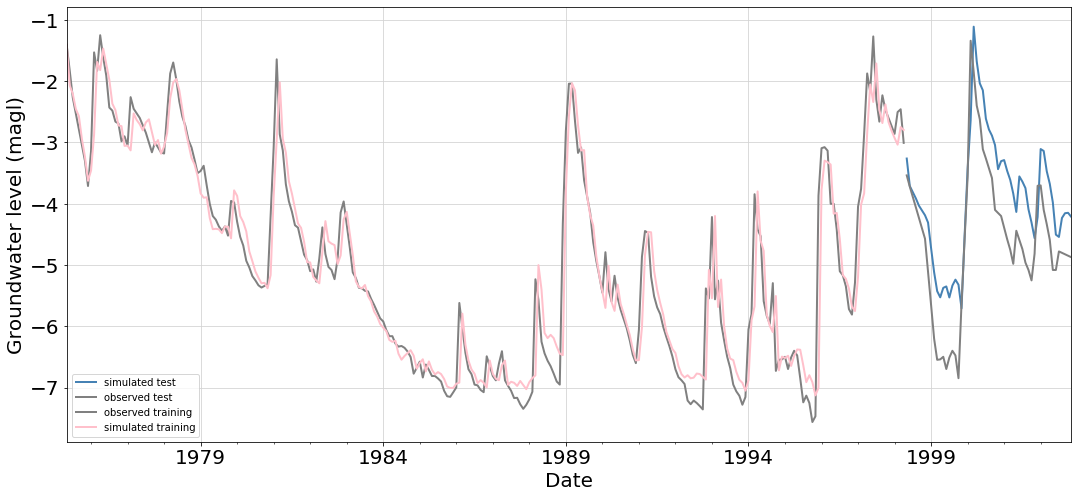

In [70]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [71]:
y_lstm = out_df['simulated test']

### GRU

In [72]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [73]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(55, 6)

    #running function
    gwl =  0.83038874
    test_forecast = X_test
    steps_ahead = 55
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Train on 276 samples, validate on 55 samples
Epoch 1/1000
 96/276 [=========>....................] - ETA: 3s - loss: 1.0137 - mean_squared_error: 1.0137
Epoch 00001: val_loss improved from inf to 0.49517, saving model to model.h5
276/276 [==============================] - 5s 18ms/sample - loss: 1.0470 - mean_squared_error: 1.0470 - val_loss: 0.4952 - val_mean_squared_error: 0.4952
Epoch 2/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7708 - mean_squared_error: 0.7708
Epoch 00002: val_loss improved from 0.49517 to 0.48671, saving model to model.h5
276/276 [==============================] - 0s 172us/sample - loss: 0.9104 - mean_squared_error: 0.9104 - val_loss: 0.4867 - val_mean_squared_error: 0.4867
Epoch 3/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.8289 - mean_squared_error: 0.8289
Epoch 00003: val_loss improved from 0.48671 to 0.48011, saving model to model.h5
276/276 [==============================] - 0s 162us/sample 

Epoch 25/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2667 - mean_squared_error: 0.2667
Epoch 00025: val_loss improved from 0.31952 to 0.30588, saving model to model.h5
276/276 [==============================] - 0s 180us/sample - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 0.3059 - val_mean_squared_error: 0.3059
Epoch 26/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2006 - mean_squared_error: 0.2006
Epoch 00026: val_loss improved from 0.30588 to 0.28989, saving model to model.h5
276/276 [==============================] - 0s 198us/sample - loss: 0.2488 - mean_squared_error: 0.2488 - val_loss: 0.2899 - val_mean_squared_error: 0.2899
Epoch 27/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2614 - mean_squared_error: 0.2614
Epoch 00027: val_loss improved from 0.28989 to 0.27596, saving model to model.h5
276/276 [==============================] - 0s 179us/sample - loss: 0.2288 - mean_squared_error: 0.2288 - val_loss: 0.276

Epoch 49/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 00049: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 95us/sample - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 50/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00050: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 79us/sample - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 51/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1405 - mean_squared_error: 0.1405
Epoch 00051: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 93us/sample - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 52/1000
 96/276 [=========>....................] - E

 96/276 [=========>....................] - ETA: 0s - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 00075: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 146us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
Epoch 76/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00076: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 91us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1714 - val_mean_squared_error: 0.1714
Epoch 77/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00077: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 85us/sample - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.1715 - val_mean_squared_error: 0.1715
Epoch 78/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 00101: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 90us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1515 - mean_squared_error: 0.1515
Epoch 00102: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 85us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.1926 - val_mean_squared_error: 0.1926
Epoch 103/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00103: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 79us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.1947 - val_mean_squared_error: 0.1947
Epoch 104/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00127: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 138us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 128/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00128: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 84us/sample - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 129/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1219 - mean_squared_error: 0.1219
Epoch 00129: val_loss did not improve from 0.12765
276/276 [==============================] - 0s 99us/sample - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.2145 - val_mean_squared_error: 0.2145
Epoch 130/1000
 96/276 [=========>....................] - ETA: 0s - l

Epoch 6/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.8573 - mean_squared_error: 0.8573
Epoch 00006: val_loss improved from 0.48970 to 0.48535, saving model to model.h5
276/276 [==============================] - 0s 142us/sample - loss: 0.8089 - mean_squared_error: 0.8089 - val_loss: 0.4854 - val_mean_squared_error: 0.4854
Epoch 7/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7081 - mean_squared_error: 0.7081
Epoch 00007: val_loss improved from 0.48535 to 0.48234, saving model to model.h5
276/276 [==============================] - 0s 141us/sample - loss: 0.7306 - mean_squared_error: 0.7306 - val_loss: 0.4823 - val_mean_squared_error: 0.4823
Epoch 8/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7166 - mean_squared_error: 0.7166
Epoch 00008: val_loss improved from 0.48234 to 0.47988, saving model to model.h5
276/276 [==============================] - 0s 139us/sample - loss: 0.6983 - mean_squared_error: 0.6983 - val_loss: 0.4799 -

Epoch 30/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2630 - mean_squared_error: 0.2630
Epoch 00030: val_loss improved from 0.29640 to 0.28296, saving model to model.h5
276/276 [==============================] - 0s 161us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.2830 - val_mean_squared_error: 0.2830
Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2311 - mean_squared_error: 0.2311
Epoch 00031: val_loss improved from 0.28296 to 0.26956, saving model to model.h5
276/276 [==============================] - 0s 140us/sample - loss: 0.2223 - mean_squared_error: 0.2223 - val_loss: 0.2696 - val_mean_squared_error: 0.2696
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1815 - mean_squared_error: 0.1815
Epoch 00032: val_loss improved from 0.26956 to 0.25637, saving model to model.h5
276/276 [==============================] - 0s 147us/sample - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.256

Epoch 54/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 00054: val_loss improved from 0.14985 to 0.14918, saving model to model.h5
276/276 [==============================] - 0s 144us/sample - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.1492 - val_mean_squared_error: 0.1492
Epoch 55/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 00055: val_loss improved from 0.14918 to 0.14871, saving model to model.h5
276/276 [==============================] - 0s 134us/sample - loss: 0.1526 - mean_squared_error: 0.1526 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 56/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1781 - mean_squared_error: 0.1781
Epoch 00056: val_loss did not improve from 0.14871
276/276 [==============================] - 0s 76us/sample - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.1487 - val_mean_squared_error: 0.1

Epoch 80/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1814 - mean_squared_error: 0.1814
Epoch 00080: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 91us/sample - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 81/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 00081: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 83us/sample - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 82/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2168 - mean_squared_error: 0.2168
Epoch 00082: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 90us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 83/1000
 96/276 [=========>....................] - E

 96/276 [=========>....................] - ETA: 0s - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 00106: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 92us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 107/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1192 - mean_squared_error: 0.1192
Epoch 00107: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 111us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 108/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00108: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 132us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.1589 - val_mean_squared_error: 0.1589
Epoch 109/1000
 96/276 [=========>....................] - ETA: 0s - 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1230 - mean_squared_error: 0.1230
Epoch 00132: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 100us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.1711 - val_mean_squared_error: 0.1711
Epoch 133/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00133: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 83us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 134/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00134: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 82us/sample - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.1728 - val_mean_squared_error: 0.1728
Epoch 135/1000
 96/276 [=========>....................] - ETA: 0s - l

 96/276 [=========>....................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00158: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 135us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.1852 - val_mean_squared_error: 0.1852
Epoch 159/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00159: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 132us/sample - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1854 - val_mean_squared_error: 0.1854
Epoch 160/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00160: val_loss did not improve from 0.14655
276/276 [==============================] - 0s 137us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.1865 - val_mean_squared_error: 0.1865
Epoch 161/1000
 96/276 [=========>....................] - ETA: 0s -

 96/276 [=========>....................] - ETA: 0s - loss: 0.3433 - mean_squared_error: 0.3433
Epoch 00007: val_loss improved from 0.29495 to 0.28827, saving model to model.h5
276/276 [==============================] - 0s 155us/sample - loss: 0.3549 - mean_squared_error: 0.3549 - val_loss: 0.2883 - val_mean_squared_error: 0.2883
Epoch 8/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3804 - mean_squared_error: 0.3804
Epoch 00008: val_loss improved from 0.28827 to 0.28126, saving model to model.h5
276/276 [==============================] - 0s 161us/sample - loss: 0.3425 - mean_squared_error: 0.3425 - val_loss: 0.2813 - val_mean_squared_error: 0.2813
Epoch 9/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3051 - mean_squared_error: 0.3051
Epoch 00009: val_loss improved from 0.28126 to 0.27431, saving model to model.h5
276/276 [==============================] - 0s 154us/sample - loss: 0.3124 - mean_squared_error: 0.3124 - val_loss: 0.2743 - val_mean_squ

Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 00031: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 152us/sample - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 00032: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 87us/sample - loss: 0.1457 - mean_squared_error: 0.1457 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1375 - mean_squared_error: 0.1375
Epoch 00033: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 106us/sample - loss: 0.1394 - mean_squared_error: 0.1394 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 34/1000
 96/276 [=========>....................] -

 96/276 [=========>....................] - ETA: 0s - loss: 0.1390 - mean_squared_error: 0.1390
Epoch 00057: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 89us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1258 - mean_squared_error: 0.1258
Epoch 00058: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 105us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.2197 - val_mean_squared_error: 0.2197
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1458 - mean_squared_error: 0.1458
Epoch 00059: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 86us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1062 - mean_squared_error: 0.1062
Epoch 00083: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 98us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1380 - mean_squared_error: 0.1380
Epoch 00084: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 87us/sample - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.2366 - val_mean_squared_error: 0.2366
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00085: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 142us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.2358 - val_mean_squared_error: 0.2358
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00109: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 145us/sample - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.2394 - val_mean_squared_error: 0.2394
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00110: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 88us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.2443 - val_mean_squared_error: 0.2443
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00111: val_loss did not improve from 0.15113
276/276 [==============================] - 0s 88us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.2457 - val_mean_squared_error: 0.2457
Epoch 112/1000
 96/276 [=========>....................] - ETA: 0s - l

276/276 [==============================] - 0s 199us/sample - loss: 0.7120 - mean_squared_error: 0.7120 - val_loss: 0.5126 - val_mean_squared_error: 0.5126
Epoch 6/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7851 - mean_squared_error: 0.7851
Epoch 00006: val_loss improved from 0.51258 to 0.50961, saving model to model.h5
276/276 [==============================] - 0s 167us/sample - loss: 0.6858 - mean_squared_error: 0.6858 - val_loss: 0.5096 - val_mean_squared_error: 0.5096
Epoch 7/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.6435 - mean_squared_error: 0.6435
Epoch 00007: val_loss improved from 0.50961 to 0.50635, saving model to model.h5
276/276 [==============================] - 0s 163us/sample - loss: 0.6069 - mean_squared_error: 0.6069 - val_loss: 0.5064 - val_mean_squared_error: 0.5064
Epoch 8/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5827 - mean_squared_error: 0.5827
Epoch 00008: val_loss improved from 0.50635 to 0.

 96/276 [=========>....................] - ETA: 0s - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 00029: val_loss improved from 0.23807 to 0.22492, saving model to model.h5
276/276 [==============================] - 0s 195us/sample - loss: 0.1988 - mean_squared_error: 0.1988 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 30/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2228 - mean_squared_error: 0.2228
Epoch 00030: val_loss improved from 0.22492 to 0.21156, saving model to model.h5
276/276 [==============================] - 0s 153us/sample - loss: 0.1816 - mean_squared_error: 0.1816 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 00031: val_loss improved from 0.21156 to 0.19901, saving model to model.h5
276/276 [==============================] - 0s 146us/sample - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.1990 - val_mean_s

Epoch 54/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00054: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 120us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1619 - val_mean_squared_error: 0.1619
Epoch 55/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1802 - mean_squared_error: 0.1802
Epoch 00055: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 167us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.1637 - val_mean_squared_error: 0.1637
Epoch 56/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 00056: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 108us/sample - loss: 0.1338 - mean_squared_error: 0.1338 - val_loss: 0.1638 - val_mean_squared_error: 0.1638
Epoch 57/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1683 - mean_squared_error: 0.1683
Epoch 00080: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 132us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.1975 - val_mean_squared_error: 0.1975
Epoch 81/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00081: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 155us/sample - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.1981 - val_mean_squared_error: 0.1981
Epoch 82/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1303 - mean_squared_error: 0.1303
Epoch 00082: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 128us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1978 - val_mean_squared_error: 0.1978
Epoch 83/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00106: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 127us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 107/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00107: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 115us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 108/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 00108: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 124us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 109/1000
 96/276 [=========>....................] - ETA: 0s -

 96/276 [=========>....................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00132: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 91us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 133/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 00133: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 77us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 134/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00134: val_loss did not improve from 0.14375
276/276 [==============================] - 0s 79us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.2081 - val_mean_squared_error: 0.2081
Epoch 135/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 14/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5366 - mean_squared_error: 0.5366
Epoch 00014: val_loss improved from 0.32181 to 0.31355, saving model to model.h5
276/276 [==============================] - 0s 149us/sample - loss: 0.5659 - mean_squared_error: 0.5659 - val_loss: 0.3136 - val_mean_squared_error: 0.3136
Epoch 15/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4759 - mean_squared_error: 0.4759
Epoch 00015: val_loss improved from 0.31355 to 0.30550, saving model to model.h5
276/276 [==============================] - 0s 132us/sample - loss: 0.5000 - mean_squared_error: 0.5000 - val_loss: 0.3055 - val_mean_squared_error: 0.3055
Epoch 16/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5177 - mean_squared_error: 0.5177
Epoch 00016: val_loss improved from 0.30550 to 0.29725, saving model to model.h5
276/276 [==============================] - 0s 195us/sample - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.297

Epoch 38/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1590 - mean_squared_error: 0.1590
Epoch 00038: val_loss improved from 0.13990 to 0.13886, saving model to model.h5
276/276 [==============================] - 0s 168us/sample - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 39/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1704 - mean_squared_error: 0.1704
Epoch 00039: val_loss improved from 0.13886 to 0.13838, saving model to model.h5
276/276 [==============================] - 0s 152us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 40/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 00040: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 85us/sample - loss: 0.1325 - mean_squared_error: 0.1325 - val_loss: 0.1392 - val_mean_squared_error: 0.1

Epoch 64/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1557 - mean_squared_error: 0.1557
Epoch 00064: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 95us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.1967 - val_mean_squared_error: 0.1967
Epoch 65/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 00065: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 90us/sample - loss: 0.1087 - mean_squared_error: 0.1087 - val_loss: 0.1963 - val_mean_squared_error: 0.1963
Epoch 66/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1479 - mean_squared_error: 0.1479
Epoch 00066: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 129us/sample - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.1995 - val_mean_squared_error: 0.1995
Epoch 67/1000
 96/276 [=========>....................] - 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00090: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 87us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 91/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00091: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 139us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 92/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00092: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 97us/sample - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 93/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00116: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 103us/sample - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.2112 - val_mean_squared_error: 0.2112
Epoch 117/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00117: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 95us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 118/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00118: val_loss did not improve from 0.13838
276/276 [==============================] - 0s 87us/sample - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 119/1000
 96/276 [=========>....................] - ETA: 0s - l

Epoch 3/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.6807 - mean_squared_error: 0.6807
Epoch 00003: val_loss improved from 0.49166 to 0.47678, saving model to model.h5
276/276 [==============================] - 0s 126us/sample - loss: 0.7457 - mean_squared_error: 0.7457 - val_loss: 0.4768 - val_mean_squared_error: 0.4768
Epoch 4/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7594 - mean_squared_error: 0.7594
Epoch 00004: val_loss improved from 0.47678 to 0.46280, saving model to model.h5
276/276 [==============================] - 0s 130us/sample - loss: 0.7201 - mean_squared_error: 0.7201 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 5/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5839 - mean_squared_error: 0.5839
Epoch 00005: val_loss improved from 0.46280 to 0.45036, saving model to model.h5
276/276 [==============================] - 0s 161us/sample - loss: 0.6358 - mean_squared_error: 0.6358 - val_loss: 0.4504 -

Epoch 27/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2461 - mean_squared_error: 0.2461
Epoch 00027: val_loss improved from 0.20411 to 0.19747, saving model to model.h5
276/276 [==============================] - 0s 135us/sample - loss: 0.2125 - mean_squared_error: 0.2125 - val_loss: 0.1975 - val_mean_squared_error: 0.1975
Epoch 28/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 00028: val_loss improved from 0.19747 to 0.19239, saving model to model.h5
276/276 [==============================] - 0s 138us/sample - loss: 0.2095 - mean_squared_error: 0.2095 - val_loss: 0.1924 - val_mean_squared_error: 0.1924
Epoch 29/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1641 - mean_squared_error: 0.1641
Epoch 00029: val_loss improved from 0.19239 to 0.18834, saving model to model.h5
276/276 [==============================] - 0s 143us/sample - loss: 0.1832 - mean_squared_error: 0.1832 - val_loss: 0.188

Epoch 53/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 00053: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 85us/sample - loss: 0.1271 - mean_squared_error: 0.1271 - val_loss: 0.2459 - val_mean_squared_error: 0.2459
Epoch 54/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1467 - mean_squared_error: 0.1467
Epoch 00054: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 134us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.2495 - val_mean_squared_error: 0.2495
Epoch 55/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1548 - mean_squared_error: 0.1548
Epoch 00055: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 75us/sample - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.2495 - val_mean_squared_error: 0.2495
Epoch 56/1000
 96/276 [=========>....................] - 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00079: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 106us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.2566 - val_mean_squared_error: 0.2566
Epoch 80/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00080: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 84us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2600 - val_mean_squared_error: 0.2600
Epoch 81/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00081: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 95us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.2620 - val_mean_squared_error: 0.2620
Epoch 82/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1464 - mean_squared_error: 0.1464
Epoch 00105: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 83us/sample - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 106/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00106: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 81us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.2608 - val_mean_squared_error: 0.2608
Epoch 107/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00107: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 83us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Epoch 108/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 131/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 00131: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 154us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.2599 - val_mean_squared_error: 0.2599
Epoch 132/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00132: val_loss did not improve from 0.18313
276/276 [==============================] - 0s 118us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Running fold 7
(276, 6)
Train on 276 samples, validate on 55 samples
Epoch 1/1000
 96/276 [=========>....................] - ETA: 3s - loss: 1.3769 - mean_squared_error: 1.3769
Epoch 00001: val_loss improved from inf to 0.60509, saving model to model.h5
276/276 [==============================] - 5s 20ms/sample - loss: 1.3154 - mean_squared_error: 1.3154 - val_loss: 

Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3162 - mean_squared_error: 0.3162
Epoch 00023: val_loss improved from 0.48026 to 0.46722, saving model to model.h5
276/276 [==============================] - 0s 155us/sample - loss: 0.3273 - mean_squared_error: 0.3273 - val_loss: 0.4672 - val_mean_squared_error: 0.4672
Epoch 24/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3911 - mean_squared_error: 0.3911
Epoch 00024: val_loss improved from 0.46722 to 0.45225, saving model to model.h5
276/276 [==============================] - 0s 156us/sample - loss: 0.3172 - mean_squared_error: 0.3172 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 25/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3266 - mean_squared_error: 0.3266
Epoch 00025: val_loss improved from 0.45225 to 0.43640, saving model to model.h5
276/276 [==============================] - 0s 181us/sample - loss: 0.3069 - mean_squared_error: 0.3069 - val_loss: 0.436

Epoch 47/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1518 - mean_squared_error: 0.1518
Epoch 00047: val_loss improved from 0.14325 to 0.13991, saving model to model.h5
276/276 [==============================] - 0s 144us/sample - loss: 0.1558 - mean_squared_error: 0.1558 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 48/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1557 - mean_squared_error: 0.1557
Epoch 00048: val_loss improved from 0.13991 to 0.13721, saving model to model.h5
276/276 [==============================] - 0s 177us/sample - loss: 0.1375 - mean_squared_error: 0.1375 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 49/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1613 - mean_squared_error: 0.1613
Epoch 00049: val_loss improved from 0.13721 to 0.13566, saving model to model.h5
276/276 [==============================] - 0s 167us/sample - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.135

Epoch 73/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00073: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 94us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 74/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00074: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 88us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 75/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 00075: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 76us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 76/1000
 96/276 [=========>....................] - E

 96/276 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00099: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 81us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.1440 - val_mean_squared_error: 0.1440
Epoch 100/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00100: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 98us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1454 - val_mean_squared_error: 0.1454
Epoch 101/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00101: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 83us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0911 - mean_squared_error: 0.0911
Epoch 00125: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 86us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 126/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00126: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 92us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 127/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1346 - mean_squared_error: 0.1346
Epoch 00127: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 84us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 128/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1410 - mean_squared_error: 0.1410
Epoch 00151: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 97us/sample - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 152/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00152: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 85us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 153/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1319 - mean_squared_error: 0.1319
Epoch 00153: val_loss did not improve from 0.13393
276/276 [==============================] - 0s 81us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.1589 - val_mean_squared_error: 0.1589
Epoch 154/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 21/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5329 - mean_squared_error: 0.5329
Epoch 00021: val_loss improved from 0.58823 to 0.57489, saving model to model.h5
276/276 [==============================] - 0s 146us/sample - loss: 0.5876 - mean_squared_error: 0.5876 - val_loss: 0.5749 - val_mean_squared_error: 0.5749
Epoch 22/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5361 - mean_squared_error: 0.5361
Epoch 00022: val_loss improved from 0.57489 to 0.56171, saving model to model.h5
276/276 [==============================] - 0s 172us/sample - loss: 0.5719 - mean_squared_error: 0.5719 - val_loss: 0.5617 - val_mean_squared_error: 0.5617
Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5120 - mean_squared_error: 0.5120
Epoch 00023: val_loss improved from 0.56171 to 0.54839, saving model to model.h5
276/276 [==============================] - 0s 146us/sample - loss: 0.5582 - mean_squared_error: 0.5582 - val_loss: 0.548

Epoch 45/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 00045: val_loss improved from 0.26153 to 0.25631, saving model to model.h5
276/276 [==============================] - 0s 141us/sample - loss: 0.2174 - mean_squared_error: 0.2174 - val_loss: 0.2563 - val_mean_squared_error: 0.2563
Epoch 46/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2681 - mean_squared_error: 0.2681
Epoch 00046: val_loss improved from 0.25631 to 0.25304, saving model to model.h5
276/276 [==============================] - 0s 171us/sample - loss: 0.2240 - mean_squared_error: 0.2240 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 47/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2028 - mean_squared_error: 0.2028
Epoch 00047: val_loss improved from 0.25304 to 0.25083, saving model to model.h5
276/276 [==============================] - 0s 196us/sample - loss: 0.2068 - mean_squared_error: 0.2068 - val_loss: 0.250

Epoch 71/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1228 - mean_squared_error: 0.1228
Epoch 00071: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 86us/sample - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.3632 - val_mean_squared_error: 0.3632
Epoch 72/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 00072: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 78us/sample - loss: 0.1517 - mean_squared_error: 0.1517 - val_loss: 0.3677 - val_mean_squared_error: 0.3677
Epoch 73/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 00073: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 79us/sample - loss: 0.1364 - mean_squared_error: 0.1364 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
Epoch 74/1000
 96/276 [=========>....................] - E

 96/276 [=========>....................] - ETA: 0s - loss: 0.1434 - mean_squared_error: 0.1434
Epoch 00097: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 106us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.3775 - val_mean_squared_error: 0.3775
Epoch 98/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00098: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 88us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.3707 - val_mean_squared_error: 0.3707
Epoch 99/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00099: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 85us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 100/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00123: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 80us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.3618 - val_mean_squared_error: 0.3618
Epoch 124/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00124: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 88us/sample - loss: 0.1033 - mean_squared_error: 0.1033 - val_loss: 0.3596 - val_mean_squared_error: 0.3596
Epoch 125/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1287 - mean_squared_error: 0.1287
Epoch 00125: val_loss did not improve from 0.24966
276/276 [==============================] - 0s 78us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.3528 - val_mean_squared_error: 0.3528
Epoch 126/1000
 96/276 [=========>....................] - ETA: 0s - lo

Train on 276 samples, validate on 55 samples
Epoch 1/1000
 96/276 [=========>....................] - ETA: 3s - loss: 1.2860 - mean_squared_error: 1.2860
Epoch 00001: val_loss improved from inf to 0.64469, saving model to model.h5
276/276 [==============================] - 6s 21ms/sample - loss: 1.1586 - mean_squared_error: 1.1586 - val_loss: 0.6447 - val_mean_squared_error: 0.6447
Epoch 2/1000
 96/276 [=========>....................] - ETA: 0s - loss: 1.0147 - mean_squared_error: 1.0147
Epoch 00002: val_loss improved from 0.64469 to 0.63904, saving model to model.h5
276/276 [==============================] - 0s 134us/sample - loss: 1.0186 - mean_squared_error: 1.0186 - val_loss: 0.6390 - val_mean_squared_error: 0.6390
Epoch 3/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.7930 - mean_squared_error: 0.7930
Epoch 00003: val_loss improved from 0.63904 to 0.63021, saving model to model.h5
276/276 [==============================] - 0s 132us/sample - loss: 0.9544 - mean_sq

Epoch 25/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2442 - mean_squared_error: 0.2442
Epoch 00025: val_loss improved from 0.34404 to 0.32465, saving model to model.h5
276/276 [==============================] - 0s 197us/sample - loss: 0.2826 - mean_squared_error: 0.2826 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 26/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2937 - mean_squared_error: 0.2937
Epoch 00026: val_loss improved from 0.32465 to 0.30751, saving model to model.h5
276/276 [==============================] - 0s 156us/sample - loss: 0.2837 - mean_squared_error: 0.2837 - val_loss: 0.3075 - val_mean_squared_error: 0.3075
Epoch 27/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2828 - mean_squared_error: 0.2828
Epoch 00027: val_loss improved from 0.30751 to 0.29009, saving model to model.h5
276/276 [==============================] - 0s 142us/sample - loss: 0.2763 - mean_squared_error: 0.2763 - val_loss: 0.290

 96/276 [=========>....................] - ETA: 0s - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 00049: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 109us/sample - loss: 0.1447 - mean_squared_error: 0.1447 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 50/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1624 - mean_squared_error: 0.1624
Epoch 00050: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 124us/sample - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.1617 - val_mean_squared_error: 0.1617
Epoch 51/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00051: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 84us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 52/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.1281 - mean_squared_error: 0.1281
Epoch 00075: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 83us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 76/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00076: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 94us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 77/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00077: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 93us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2154 - val_mean_squared_error: 0.2154
Epoch 78/1000
 96/276 [=========>....................] - ETA: 0s - loss:

 96/276 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00101: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 86us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00102: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 89us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 103/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0786 - mean_squared_error: 0.0786
Epoch 00103: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 82us/sample - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 104/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00127: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 99us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.2408 - val_mean_squared_error: 0.2408
Epoch 128/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 00128: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 84us/sample - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.2362 - val_mean_squared_error: 0.2362
Epoch 129/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00129: val_loss did not improve from 0.14823
276/276 [==============================] - 0s 73us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 130/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.4787 - mean_squared_error: 0.4787
Epoch 00008: val_loss improved from 0.39432 to 0.38499, saving model to model.h5
276/276 [==============================] - 0s 153us/sample - loss: 0.5294 - mean_squared_error: 0.5294 - val_loss: 0.3850 - val_mean_squared_error: 0.3850
Epoch 9/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4756 - mean_squared_error: 0.4756
Epoch 00009: val_loss improved from 0.38499 to 0.37536, saving model to model.h5
276/276 [==============================] - 0s 140us/sample - loss: 0.4756 - mean_squared_error: 0.4756 - val_loss: 0.3754 - val_mean_squared_error: 0.3754
Epoch 10/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4218 - mean_squared_error: 0.4218
Epoch 00010: val_loss improved from 0.37536 to 0.36723, saving model to model.h5
276/276 [==============================] - 0s 185us/sample - loss: 0.4614 - mean_squared_error: 0.4614 - val_loss: 0.3672 - val_mean_sq

Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 00032: val_loss improved from 0.19175 to 0.18936, saving model to model.h5
276/276 [==============================] - 0s 144us/sample - loss: 0.1800 - mean_squared_error: 0.1800 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2531 - mean_squared_error: 0.2531
Epoch 00033: val_loss improved from 0.18936 to 0.18740, saving model to model.h5
276/276 [==============================] - 0s 148us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.1874 - val_mean_squared_error: 0.1874
Epoch 34/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1581 - mean_squared_error: 0.1581
Epoch 00034: val_loss improved from 0.18740 to 0.18659, saving model to model.h5
276/276 [==============================] - 0s 139us/sample - loss: 0.1637 - mean_squared_error: 0.1637 - val_loss: 0.186

Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1617 - mean_squared_error: 0.1617
Epoch 00058: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 90us/sample - loss: 0.1241 - mean_squared_error: 0.1241 - val_loss: 0.2448 - val_mean_squared_error: 0.2448
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1683 - mean_squared_error: 0.1683
Epoch 00059: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 73us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 00060: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 87us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.2495 - val_mean_squared_error: 0.2495
Epoch 61/1000
 96/276 [=========>....................] - E

 96/276 [=========>....................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00084: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 81us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.2560 - val_mean_squared_error: 0.2560
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1318 - mean_squared_error: 0.1318
Epoch 00085: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 82us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1167 - mean_squared_error: 0.1167
Epoch 00086: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 91us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.2563 - val_mean_squared_error: 0.2563
Epoch 87/1000
 96/276 [=========>....................] - ETA: 0s - loss:

 96/276 [=========>....................] - ETA: 0s - loss: 0.1253 - mean_squared_error: 0.1253
Epoch 00110: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 78us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.2457 - val_mean_squared_error: 0.2457
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 00111: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 91us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.2423 - val_mean_squared_error: 0.2423
Epoch 112/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00112: val_loss did not improve from 0.18470
276/276 [==============================] - 0s 74us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.2440 - val_mean_squared_error: 0.2440
Epoch 113/1000
 96/276 [=========>....................] - ETA: 0s - lo

In [74]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.207     0.454   0.611    0.402
1   Iteration_2    0.167     0.409   0.685    0.359
2   Iteration_3    0.227     0.477   0.572    0.424
3   Iteration_4    0.185     0.430   0.652    0.374
4   Iteration_5    0.191     0.437   0.640    0.392
5   Iteration_6    0.232     0.482   0.562    0.430
6   Iteration_7    0.143     0.378   0.731    0.329
7   Iteration_8    0.340     0.583   0.358    0.520
8   Iteration_9    0.215     0.463   0.596    0.413
9  Iteration_10    0.224     0.473   0.578    0.423

In [75]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [76]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[276:331, 6].values


In [77]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:276]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[276:331]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.091
Root mean squared error is: 0.302
Mean absolute error is: 0.194
R^2 score is:  0.916

The model performance for the test set
--------------------------------------
R^2 score is:  0.599
Mean squared error is: 0.213
Root mean squared error is: 0.459
Mean absolute error is: 0.407


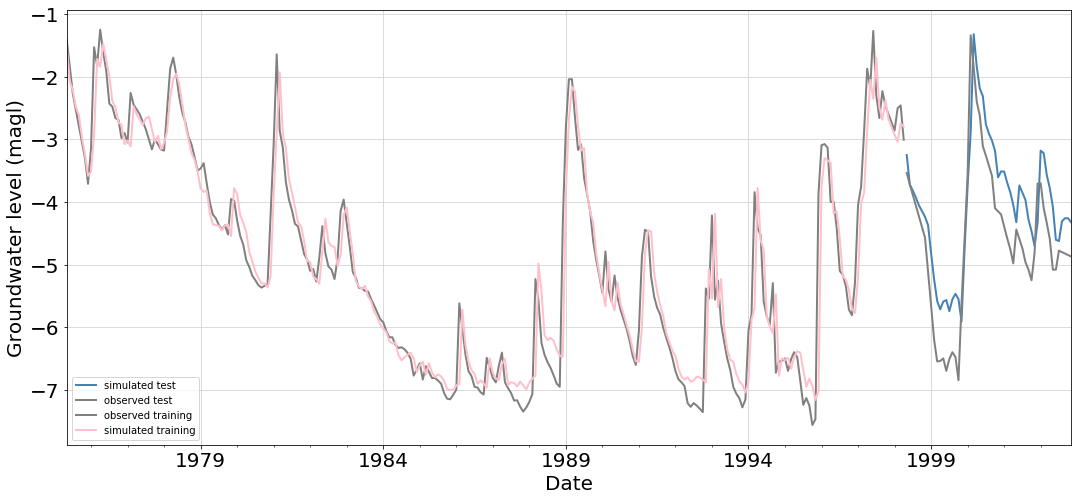

In [78]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [79]:
y_gru = out_df['simulated test']

### FFNN

In [80]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(55, 6)

    #running function
    gwl =  0.83038874
    test_forecast = X_test
    steps_ahead = 55
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(276, 6)
Train on 276 samples, validate on 55 samples
Epoch 1/1000
 96/276 [=========>....................] - ETA: 4s - loss: 1.1786 - mean_squared_error: 1.1786
Epoch 00001: val_loss improved from inf to 0.57010, saving model to model.h5
276/276 [==============================] - 7s 25ms/sample - loss: 1.0521 - mean_squared_error: 1.0521 - val_loss: 0.5701 - val_mean_squared_error: 0.5701
Epoch 2/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.9399 - mean_squared_error: 0.9399
Epoch 00002: val_loss improved from 0.57010 to 0.48261, saving model to model.h5
276/276 [==============================] - 0s 293us/sample - loss: 0.8267 - mean_squared_error: 0.8267 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 3/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.6436 - mean_squared_error: 0.6436
Epoch 00003: val_loss improved from 0.48261 to 0.41121, saving model to model.h5
276/276 [==============================] - 0s 208us/sample 

Epoch 26/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00026: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 142us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.2567 - val_mean_squared_error: 0.2567
Epoch 27/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 00027: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 99us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2534 - val_mean_squared_error: 0.2534
Epoch 28/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00028: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 90us/sample - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.2580 - val_mean_squared_error: 0.2580
Epoch 29/1000
 96/276 [=========>....................] - 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00052: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 106us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 53/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00053: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 91us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.2725 - val_mean_squared_error: 0.2725
Epoch 54/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00054: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 97us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.2803 - val_mean_squared_error: 0.2803
Epoch 55/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00078: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 97us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 79/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00079: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 106us/sample - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.2888 - val_mean_squared_error: 0.2888
Epoch 80/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00080: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 169us/sample - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 81/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00104: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 94us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.2868 - val_mean_squared_error: 0.2868
Epoch 105/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 00105: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 89us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 106/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 00106: val_loss did not improve from 0.17911
276/276 [==============================] - 0s 93us/sample - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.2850 - val_mean_squared_error: 0.2850
Epoch 107/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1401 - mean_squared_error: 0.1401
Epoch 00016: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 110us/sample - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.2448 - val_mean_squared_error: 0.2448
Epoch 17/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00017: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 101us/sample - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.2542 - val_mean_squared_error: 0.2542
Epoch 18/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1228 - mean_squared_error: 0.1228
Epoch 00018: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 145us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.2523 - val_mean_squared_error: 0.2523
Epoch 19/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 00042: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 102us/sample - loss: 0.1042 - mean_squared_error: 0.1042 - val_loss: 0.2881 - val_mean_squared_error: 0.2881
Epoch 43/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00043: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 101us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.2626 - val_mean_squared_error: 0.2626
Epoch 44/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00044: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 108us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.2992 - val_mean_squared_error: 0.2992
Epoch 45/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 00068: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 152us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.2903 - val_mean_squared_error: 0.2903
Epoch 69/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00069: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 102us/sample - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.2949 - val_mean_squared_error: 0.2949
Epoch 70/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 00070: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 93us/sample - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.2532 - val_mean_squared_error: 0.2532
Epoch 71/1000
 96/276 [=========>....................] - ETA: 0s - los

 96/276 [=========>....................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00094: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 104us/sample - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.3093 - val_mean_squared_error: 0.3093
Epoch 95/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1233 - mean_squared_error: 0.1233
Epoch 00095: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 102us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.2836 - val_mean_squared_error: 0.2836
Epoch 96/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00096: val_loss did not improve from 0.16916
276/276 [==============================] - 0s 101us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 97/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00013: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 157us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.2556 - val_mean_squared_error: 0.2556
Epoch 14/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00014: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 114us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 15/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 00015: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 110us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 16/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00039: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 113us/sample - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.3030 - val_mean_squared_error: 0.3030
Epoch 40/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00040: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 120us/sample - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.3027 - val_mean_squared_error: 0.3027
Epoch 41/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00041: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 112us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.2603 - val_mean_squared_error: 0.2603
Epoch 42/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1240 - mean_squared_error: 0.1240
Epoch 00065: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 104us/sample - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.3071 - val_mean_squared_error: 0.3071
Epoch 66/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00066: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 123us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.3252 - val_mean_squared_error: 0.3252
Epoch 67/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1379 - mean_squared_error: 0.1379
Epoch 00067: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 102us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.3102 - val_mean_squared_error: 0.3102
Epoch 68/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00091: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 116us/sample - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.2972 - val_mean_squared_error: 0.2972
Epoch 92/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 00092: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 111us/sample - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.3088 - val_mean_squared_error: 0.3088
Epoch 93/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 00093: val_loss did not improve from 0.20313
276/276 [==============================] - 0s 112us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.3301 - val_mean_squared_error: 0.3301
Epoch 94/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1840 - mean_squared_error: 0.1840
Epoch 00007: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 117us/sample - loss: 0.1320 - mean_squared_error: 0.1320 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 8/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00008: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 118us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 9/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 00009: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 115us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 10/1000
 96/276 [=========>....................] - ETA: 0s - loss

 96/276 [=========>....................] - ETA: 0s - loss: 0.1172 - mean_squared_error: 0.1172
Epoch 00033: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 114us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.3016 - val_mean_squared_error: 0.3016
Epoch 34/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 00034: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 129us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.3635 - val_mean_squared_error: 0.3635
Epoch 35/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0911 - mean_squared_error: 0.0911
Epoch 00035: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 135us/sample - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.3045 - val_mean_squared_error: 0.3045
Epoch 36/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00059: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 151us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1276 - mean_squared_error: 0.1276
Epoch 00060: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 150us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 61/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1310 - mean_squared_error: 0.1310
Epoch 00061: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 117us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.3408 - val_mean_squared_error: 0.3408
Epoch 62/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1196 - mean_squared_error: 0.1196
Epoch 00085: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 139us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.3429 - val_mean_squared_error: 0.3429
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00086: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 170us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.3777 - val_mean_squared_error: 0.3777
Epoch 87/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0891 - mean_squared_error: 0.0891
Epoch 00087: val_loss did not improve from 0.17263
276/276 [==============================] - 0s 158us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.3162 - val_mean_squared_error: 0.3162
Epoch 88/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.5283 - mean_squared_error: 0.5283
Epoch 00005: val_loss improved from 0.35573 to 0.33936, saving model to model.h5
276/276 [==============================] - 0s 358us/sample - loss: 0.5086 - mean_squared_error: 0.5086 - val_loss: 0.3394 - val_mean_squared_error: 0.3394
Epoch 6/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4642 - mean_squared_error: 0.4642
Epoch 00006: val_loss improved from 0.33936 to 0.32671, saving model to model.h5
276/276 [==============================] - 0s 401us/sample - loss: 0.5010 - mean_squared_error: 0.5010 - val_loss: 0.3267 - val_mean_squared_error: 0.3267
Epoch 7/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4052 - mean_squared_error: 0.4052
Epoch 00007: val_loss improved from 0.32671 to 0.30307, saving model to model.h5
276/276 [==============================] - 0s 353us/sample - loss: 0.4946 - mean_squared_error: 0.4946 - val_loss: 0.3031 -

 96/276 [=========>....................] - ETA: 0s - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 00030: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 116us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00031: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 124us/sample - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.2040 - val_mean_squared_error: 0.2040
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1299 - mean_squared_error: 0.1299
Epoch 00032: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 124us/sample - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.2429 - val_mean_squared_error: 0.2429
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1284 - mean_squared_error: 0.1284
Epoch 00056: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 127us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.2918 - val_mean_squared_error: 0.2918
Epoch 57/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00057: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 119us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.2586 - val_mean_squared_error: 0.2586
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00058: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 118us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.3271 - val_mean_squared_error: 0.3271
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00082: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 125us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.3098 - val_mean_squared_error: 0.3098
Epoch 83/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00083: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 139us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.4003 - val_mean_squared_error: 0.4003
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00084: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 128us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00108: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 132us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.3312 - val_mean_squared_error: 0.3312
Epoch 109/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00109: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 133us/sample - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.2705 - val_mean_squared_error: 0.2705
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00110: val_loss did not improve from 0.18059
276/276 [==============================] - 0s 120us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.2835 - val_mean_squared_error: 0.2835
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 10/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00010: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 149us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.3426 - val_mean_squared_error: 0.3426
Epoch 11/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00011: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 156us/sample - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.3151 - val_mean_squared_error: 0.3151
Epoch 12/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 00012: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 135us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.3392 - val_mean_squared_error: 0.3392
Epoch 13/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00036: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 133us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.3892 - val_mean_squared_error: 0.3892
Epoch 37/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 00037: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 167us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.4096 - val_mean_squared_error: 0.4096
Epoch 38/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00038: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 132us/sample - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 39/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 00062: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 256us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.2516 - val_mean_squared_error: 0.2516
Epoch 63/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1992 - mean_squared_error: 0.1992
Epoch 00063: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 188us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.4230 - val_mean_squared_error: 0.4230
Epoch 64/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1266 - mean_squared_error: 0.1266
Epoch 00064: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 141us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.4212 - val_mean_squared_error: 0.4212
Epoch 65/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1214 - mean_squared_error: 0.1214
Epoch 00088: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 144us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.3662 - val_mean_squared_error: 0.3662
Epoch 89/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0683 - mean_squared_error: 0.0683
Epoch 00089: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 135us/sample - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.2519 - val_mean_squared_error: 0.2519
Epoch 90/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00090: val_loss did not improve from 0.21229
276/276 [==============================] - 0s 137us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.3960 - val_mean_squared_error: 0.3960
Epoch 91/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.4423 - mean_squared_error: 0.4423
Epoch 00005: val_loss did not improve from 0.32066
276/276 [==============================] - 0s 136us/sample - loss: 0.4410 - mean_squared_error: 0.4410 - val_loss: 0.4011 - val_mean_squared_error: 0.4011
Epoch 6/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.3738 - mean_squared_error: 0.3738
Epoch 00006: val_loss improved from 0.32066 to 0.27961, saving model to model.h5
276/276 [==============================] - 0s 512us/sample - loss: 0.3411 - mean_squared_error: 0.3411 - val_loss: 0.2796 - val_mean_squared_error: 0.2796
Epoch 7/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.2194 - mean_squared_error: 0.2194
Epoch 00007: val_loss did not improve from 0.27961
276/276 [==============================] - 0s 155us/sample - loss: 0.1653 - mean_squared_error: 0.1653 - val_loss: 0.2942 - val_mean_squared_error: 0.2942
Epoch 8/1000
 96/276 [======

Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00031: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 148us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.4701 - val_mean_squared_error: 0.4701
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00032: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 209us/sample - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.2868 - val_mean_squared_error: 0.2868
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00033: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 246us/sample - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.4661 - val_mean_squared_error: 0.4661
Epoch 34/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00057: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 149us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.3004 - val_mean_squared_error: 0.3004
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1322 - mean_squared_error: 0.1322
Epoch 00058: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 150us/sample - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.4402 - val_mean_squared_error: 0.4402
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00059: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 145us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.2802 - val_mean_squared_error: 0.2802
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00083: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 141us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.4679 - val_mean_squared_error: 0.4679
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1254 - mean_squared_error: 0.1254
Epoch 00084: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 161us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00085: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 143us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.3976 - val_mean_squared_error: 0.3976
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1204 - mean_squared_error: 0.1204
Epoch 00109: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 153us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.3693 - val_mean_squared_error: 0.3693
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1240 - mean_squared_error: 0.1240
Epoch 00110: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 161us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.4053 - val_mean_squared_error: 0.4053
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1153 - mean_squared_error: 0.1153
Epoch 00111: val_loss did not improve from 0.22684
276/276 [==============================] - 0s 153us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 112/1000
 96/276 [=========>....................] - ETA: 0s -

276/276 [==============================] - 0s 607us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 13/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 00013: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 138us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.5559 - val_mean_squared_error: 0.5559
Epoch 14/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00014: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 141us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 15/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 00015: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 155us/sam

Epoch 39/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1302 - mean_squared_error: 0.1302
Epoch 00039: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 141us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.3598 - val_mean_squared_error: 0.3598
Epoch 40/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00040: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 146us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.3775 - val_mean_squared_error: 0.3775
Epoch 41/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00041: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 136us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.4220 - val_mean_squared_error: 0.4220
Epoch 42/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 00065: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 169us/sample - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.4314 - val_mean_squared_error: 0.4314
Epoch 66/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00066: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 162us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.3835 - val_mean_squared_error: 0.3835
Epoch 67/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1283 - mean_squared_error: 0.1283
Epoch 00067: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 156us/sample - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.4495 - val_mean_squared_error: 0.4495
Epoch 68/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 00091: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 159us/sample - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.3699 - val_mean_squared_error: 0.3699
Epoch 92/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1218 - mean_squared_error: 0.1218
Epoch 00092: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 166us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.4282 - val_mean_squared_error: 0.4282
Epoch 93/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 00093: val_loss did not improve from 0.25676
276/276 [==============================] - 0s 162us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.2972 - val_mean_squared_error: 0.2972
Epoch 94/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 00005: val_loss did not improve from 0.30520
276/276 [==============================] - 0s 182us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.3831 - val_mean_squared_error: 0.3831
Epoch 6/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00006: val_loss did not improve from 0.30520
276/276 [==============================] - 0s 151us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.5489 - val_mean_squared_error: 0.5489
Epoch 7/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00007: val_loss improved from 0.30520 to 0.29894, saving model to model.h5
276/276 [==============================] - 0s 589us/sample - loss: 0.1269 - mean_squared_error: 0.1269 - val_loss: 0.2989 - val_mean_squared_error: 0.2989
Epoch 8/1000
 96/276 [======

Epoch 31/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00031: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 163us/sample - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.3301 - val_mean_squared_error: 0.3301
Epoch 32/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1306 - mean_squared_error: 0.1306
Epoch 00032: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 151us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.4701 - val_mean_squared_error: 0.4701
Epoch 33/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1406 - mean_squared_error: 0.1406
Epoch 00033: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 147us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.2940 - val_mean_squared_error: 0.2940
Epoch 34/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00057: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 165us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.4687 - val_mean_squared_error: 0.4687
Epoch 58/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00058: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 171us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.5532 - val_mean_squared_error: 0.5532
Epoch 59/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1069 - mean_squared_error: 0.1069
Epoch 00059: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 161us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.4455 - val_mean_squared_error: 0.4455
Epoch 60/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00083: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 247us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.3386 - val_mean_squared_error: 0.3386
Epoch 84/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1204 - mean_squared_error: 0.1204
Epoch 00084: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 181us/sample - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.5458 - val_mean_squared_error: 0.5458
Epoch 85/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00085: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 171us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.3893 - val_mean_squared_error: 0.3893
Epoch 86/1000
 96/276 [=========>....................] - ETA: 0s - lo

 96/276 [=========>....................] - ETA: 0s - loss: 0.1213 - mean_squared_error: 0.1213
Epoch 00109: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 189us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.3036 - val_mean_squared_error: 0.3036
Epoch 110/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00110: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 187us/sample - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.4130 - val_mean_squared_error: 0.4130
Epoch 111/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1423 - mean_squared_error: 0.1423
Epoch 00111: val_loss did not improve from 0.27577
276/276 [==============================] - 0s 225us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.4067 - val_mean_squared_error: 0.4067
Epoch 112/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 23/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1253 - mean_squared_error: 0.1253
Epoch 00023: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 228us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.4362 - val_mean_squared_error: 0.4362
Epoch 24/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00024: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 214us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.4879 - val_mean_squared_error: 0.4879
Epoch 25/1000
192/276 [===================>..........] - ETA: 0s - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 00025: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 500us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.4153 - val_mean_squared_error: 0.4153
Epoch 26/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 00049: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 257us/sample - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.4877 - val_mean_squared_error: 0.4877
Epoch 50/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1027 - mean_squared_error: 0.1027
Epoch 00050: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 206us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.5418 - val_mean_squared_error: 0.5418
Epoch 51/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1421 - mean_squared_error: 0.1421
Epoch 00051: val_loss did not improve from 0.29418
276/276 [==============================] - 0s 218us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.3323 - val_mean_squared_error: 0.3323
Epoch 52/1000
 96/276 [=========>....................] - ETA: 0s - lo

Epoch 75/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1088 - mean_squared_error: 0.1088
Epoch 00075: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 191us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 76/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1379 - mean_squared_error: 0.1379
Epoch 00076: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 200us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.6481 - val_mean_squared_error: 0.6481
Epoch 77/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00077: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 185us/sample - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.4215 - val_mean_squared_error: 0.4215
Epoch 78/1000
 96/276 [=========>....................] 

 96/276 [=========>....................] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00101: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 177us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.3484 - val_mean_squared_error: 0.3484
Epoch 102/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00102: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 180us/sample - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.4589 - val_mean_squared_error: 0.4589
Epoch 103/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 00103: val_loss did not improve from 0.29188
276/276 [==============================] - 0s 174us/sample - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.4990 - val_mean_squared_error: 0.4990
Epoch 104/1000
 96/276 [=========>....................] - ETA: 0s -

Epoch 127/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00127: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 183us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.3670 - val_mean_squared_error: 0.3670
Epoch 128/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00128: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 179us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.3451 - val_mean_squared_error: 0.3451
Epoch 129/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1209 - mean_squared_error: 0.1209
Epoch 00129: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 196us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.4967 - val_mean_squared_error: 0.4967
Epoch 130/1000
 96/276 [=========>..................

Epoch 153/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00153: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 206us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.4008 - val_mean_squared_error: 0.4008
Epoch 154/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00154: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 198us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.5619 - val_mean_squared_error: 0.5619
Epoch 155/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 00155: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 189us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 156/1000
 96/276 [=========>..................

Epoch 179/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00179: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 207us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.5082 - val_mean_squared_error: 0.5082
Epoch 180/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00180: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 203us/sample - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.4255 - val_mean_squared_error: 0.4255
Epoch 181/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00181: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 184us/sample - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.5317 - val_mean_squared_error: 0.5317
Epoch 182/1000
 96/276 [=========>..................

Epoch 205/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00205: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 180us/sample - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.5311 - val_mean_squared_error: 0.5311
Epoch 206/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1425 - mean_squared_error: 0.1425
Epoch 00206: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 185us/sample - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.5478 - val_mean_squared_error: 0.5478
Epoch 207/1000
 96/276 [=========>....................] - ETA: 0s - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 00207: val_loss did not improve from 0.28619
276/276 [==============================] - 0s 191us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 208/1000
 96/276 [=========>..................

In [81]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.326    0.571  0.386   0.511
1   Iteration_2   0.326    0.571  0.386   0.511
2   Iteration_3   0.326    0.571  0.386   0.511
3   Iteration_4   0.326    0.571  0.386   0.511
4   Iteration_5   0.326    0.571  0.386   0.511
5   Iteration_6   0.326    0.571  0.386   0.511
6   Iteration_7   0.326    0.571  0.386   0.511
7   Iteration_8   0.326    0.571  0.386   0.511
8   Iteration_9   0.326    0.571  0.386   0.511
9  Iteration_10   0.326    0.571  0.386   0.511

In [82]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [83]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[276:331, 6].values


In [84]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:276]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[276:331]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.101
Root mean squared error is: 0.317
Mean absolute error is: 0.244
R^2 score is:  0.907

The model performance for the test set
--------------------------------------
R^2 score is:  0.386
Mean squared error is: 0.326
Root mean squared error is: 0.571
Mean absolute error is: 0.511


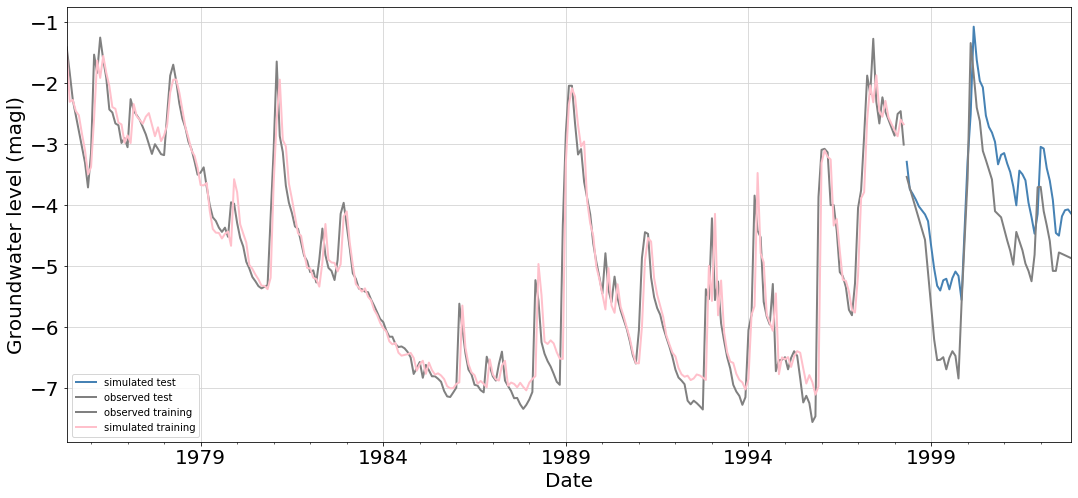

In [85]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [86]:
y_ff = out_df['simulated test']

## Static Models

In [87]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0116']]

In [88]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0116'].values
y = y.reshape(-1,1)

In [89]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(276, 6) (276, 1)
(55, 6) (55, 1)


In [90]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [91]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Running fold 2
(276, 6)
Running fold 3
(276, 6)
Running fold 4
(276, 6)
Running fold 5
(276, 6)
Running fold 6
(276, 6)
Running fold 7
(276, 6)
Running fold 8
(276, 6)
Running fold 9
(276, 6)
Running fold 10
(276, 6)


In [92]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.921    0.959  0.348   0.640
1   Iteration_2   0.991    0.996  0.298   0.677
2   Iteration_3   0.986    0.993  0.302   0.668
3   Iteration_4   0.917    0.957  0.351   0.644
4   Iteration_5   1.084    1.041  0.232   0.750
5   Iteration_6   1.015    1.007  0.281   0.691
6   Iteration_7   0.876    0.936  0.379   0.603
7   Iteration_8   0.961    0.980  0.319   0.648
8   Iteration_9   1.064    1.031  0.246   0.716
9  Iteration_10   0.890    0.943  0.370   0.619

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.313
Mean squared error is: 0.971
Root mean squared error is: 0.984
Mean absolute error is: 0.666


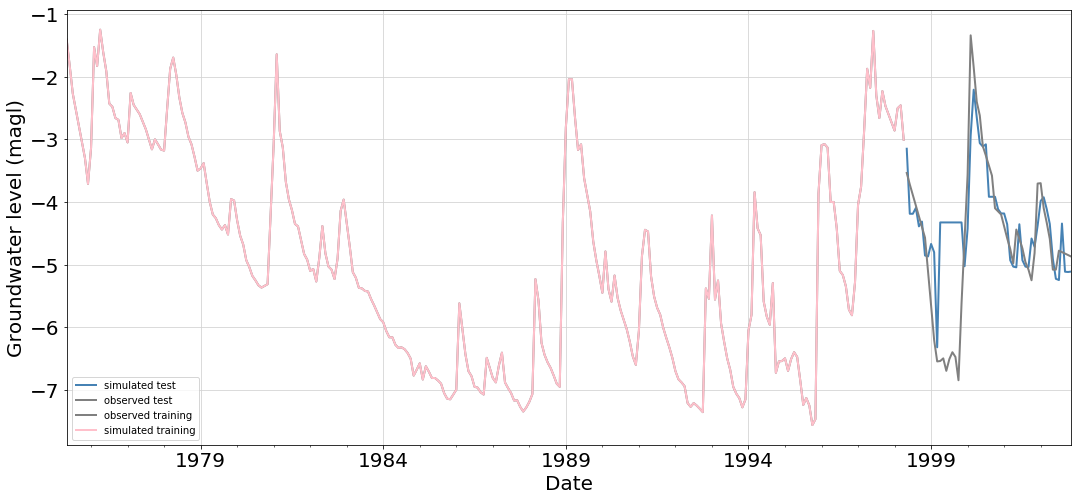

In [95]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [96]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Running fold 2
(276, 6)
Running fold 3
(276, 6)
Running fold 4
(276, 6)
Running fold 5
(276, 6)
Running fold 6
(276, 6)
Running fold 7
(276, 6)
Running fold 8
(276, 6)
Running fold 9
(276, 6)
Running fold 10
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [97]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.197     0.443   0.861    0.295
1   Iteration_2    0.197     0.443   0.861    0.295
2   Iteration_3    0.197     0.443   0.861    0.295
3   Iteration_4    0.197     0.443   0.861    0.295
4   Iteration_5    0.197     0.443   0.861    0.295
5   Iteration_6    0.197     0.443   0.861    0.295
6   Iteration_7    0.197     0.443   0.861    0.295
7   Iteration_8    0.197     0.443   0.861    0.295
8   Iteration_9    0.197     0.443   0.861    0.295
9  Iteration_10    0.197     0.443   0.861    0.295

In [98]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [99]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.251
Root mean squared error is: 0.501
Mean absolute error is: 0.271
R^2 score is:  0.913

The model performance for the test set
--------------------------------------
R^2 score is:  0.861
Mean squared error is: 0.197
Root mean squared error is: 0.443
Mean absolute error is: 0.295


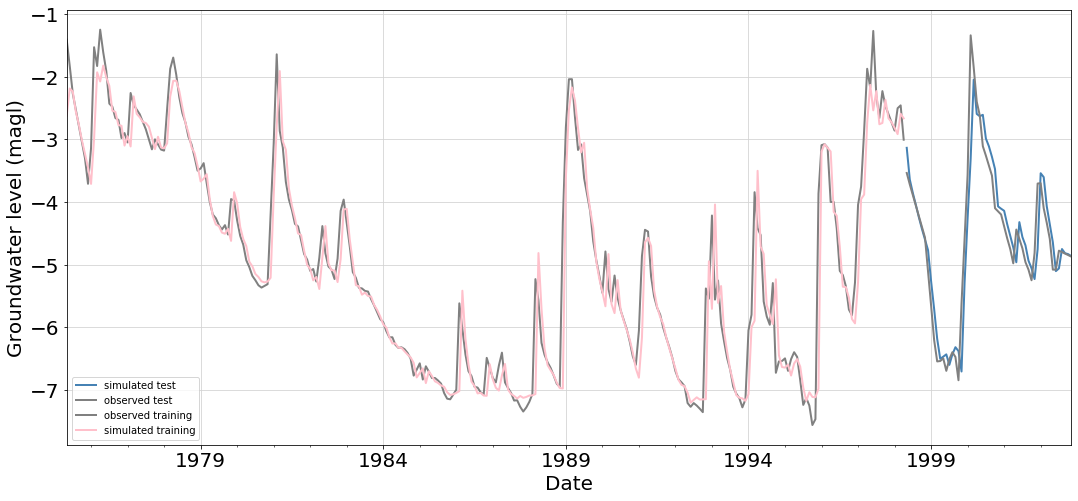

In [100]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Running fold 2
(276, 6)
Running fold 3
(276, 6)
Running fold 4
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(276, 6)
Running fold 6
(276, 6)
Running fold 7
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 8
(276, 6)
Running fold 9
(276, 6)
Running fold 10
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [102]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   1.057    1.028  0.251   0.777
1   Iteration_2   1.016    1.008  0.280   0.762
2   Iteration_3   1.019    1.009  0.278   0.755
3   Iteration_4   1.046    1.023  0.259   0.767
4   Iteration_5   1.019    1.009  0.278   0.755
5   Iteration_6   1.028    1.014  0.272   0.764
6   Iteration_7   1.032    1.016  0.269   0.764
7   Iteration_8   1.039    1.019  0.264   0.762
8   Iteration_9   0.955    0.977  0.323   0.714
9  Iteration_10   1.044    1.022  0.261   0.774

In [103]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [104]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.041
Root mean squared error is: 0.203
Mean absolute error is: 0.15
R^2 score is:  0.986

The model performance for the test set
--------------------------------------
R^2 score is:  0.273
Mean squared error is: 1.026
Root mean squared error is: 1.013
Mean absolute error is: 0.759


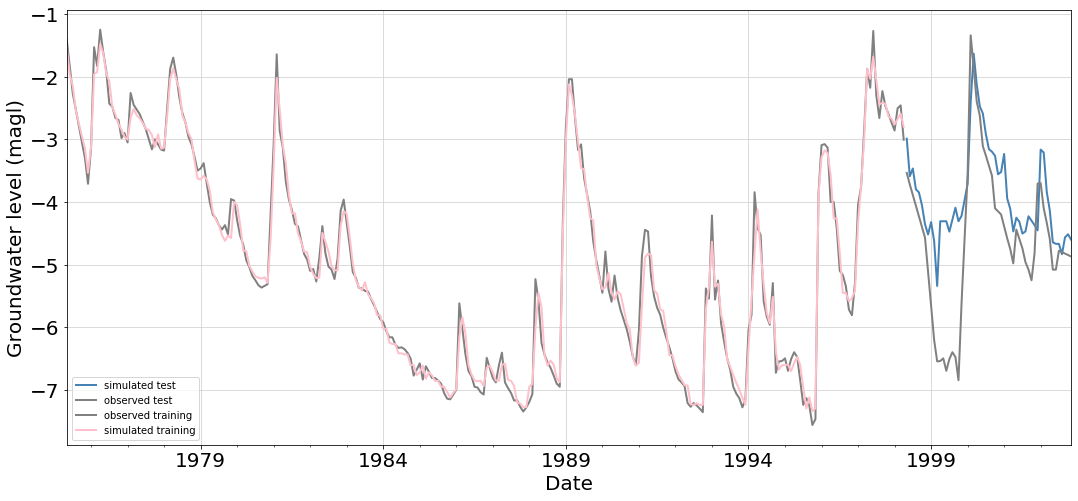

In [105]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(276, 6)
Running fold 2
(276, 6)
Running fold 3
(276, 6)
Running fold 4
(276, 6)
Running fold 5
(276, 6)
Running fold 6
(276, 6)
Running fold 7
(276, 6)
Running fold 8
(276, 6)
Running fold 9
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 10
(276, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [107]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.366    0.605  0.741   0.410
1   Iteration_2   0.536    0.732  0.620   0.475
2   Iteration_3   0.348    0.590  0.754   0.407
3   Iteration_4   0.498    0.706  0.647   0.459
4   Iteration_5   0.461    0.679  0.674   0.476
5   Iteration_6   0.471    0.686  0.666   0.458
6   Iteration_7   0.753    0.868  0.466   0.566
7   Iteration_8   0.526    0.726  0.627   0.467
8   Iteration_9   0.381    0.617  0.730   0.429
9  Iteration_10   0.508    0.713  0.640   0.459

In [108]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:276, 6].values

In [109]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.041
Root mean squared error is: 0.203
Mean absolute error is: 0.15
R^2 score is:  0.986

The model performance for the test set
--------------------------------------
R^2 score is:  0.657
Mean squared error is: 0.485
Root mean squared error is: 0.692
Mean absolute error is: 0.461


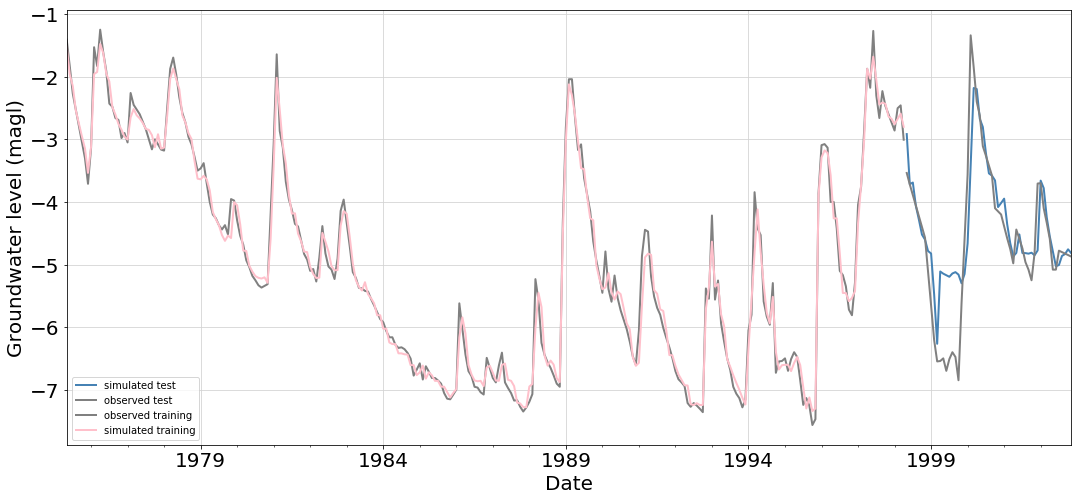

In [110]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[276:331].index)
df1['observed test']      = pima.iloc[276:331, 0].values

df2 = pd.DataFrame(pima.iloc[0:276, 0].values, columns = ['observed training'],index =pima.iloc[0:276].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [111]:
vs = pd.DataFrame(pima.iloc[276:331, 0].values, columns = ['Observed'],index =pima.iloc[276:331].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

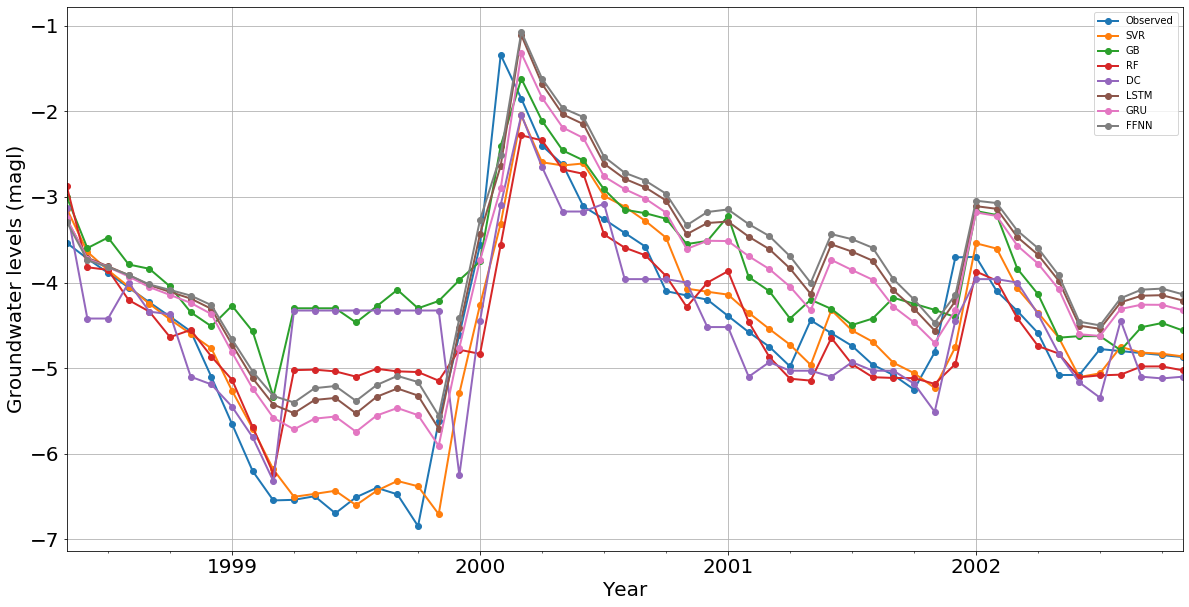

In [112]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)